In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("loan.csv")

C:\Users\ankit\AppData\Local\Temp\ipykernel_3460\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [3]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
df.size

4408587

In [6]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning

In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes)

emp_title  -  2459  -  object
emp_length  -  1075  -  object
desc  -  12942  -  object
title  -  11  -  object
mths_since_last_delinq  -  25682  -  float64
mths_since_last_record  -  36931  -  float64
revol_util  -  50  -  object
last_pymnt_d  -  71  -  object
next_pymnt_d  -  38577  -  object
last_credit_pull_d  -  2  -  object
collections_12_mths_ex_med  -  56  -  float64
mths_since_last_major_derog  -  39717  -  float64
annual_inc_joint  -  39717  -  float64
dti_joint  -  39717  -  float64
verification_status_joint  -  39717  -  float64
tot_coll_amt  -  39717  -  float64
tot_cur_bal  -  39717  -  float64
open_acc_6m  -  39717  -  float64
open_il_6m  -  39717  -  float64
open_il_12m  -  39717  -  float64
open_il_24m  -  39717  -  float64
mths_since_rcnt_il  -  39717  -  float64
total_bal_il  -  39717  -  float64
il_util  -  39717  -  float64
open_rv_12m  -  39717  -  float64
open_rv_24m  -  39717  -  float64
max_bal_bc  -  39717  -  float64
all_util  -  39717  -  float64
total_rev_hi

In [15]:
categorical_columns = ["emp_title", "emp_length", "desc", "title", "revol_util", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

In [16]:
for category in categorical_columns:
    print(category, " - ", df[category].unique().size, "\n")

emp_title  -  28821 

emp_length  -  12 

desc  -  26527 

title  -  19616 

revol_util  -  1090 

last_pymnt_d  -  102 

next_pymnt_d  -  3 

last_credit_pull_d  -  107 



#### From above analysis on categorical columns, to replace null values or delete its row we can achieve it as below

- emp_title has 28821 unique values so replacing it with mode value will not be beneficial, its better to drop these rows since as a banker I am not assured if this person will repay or not. But before deleting lets cross check the loan status for the same
- For emp_length since unique values are only 12, we will replace null values with the mode.
- For null desc we will leave it as is, since this is more like extra column and not a category column
- For title as well we will leave the column as is, since this is more like extra column and not a category column
- revol_util can be modified as numerical column, and null values of it can be replaced by median
- last_pymnt_d, next_pymnt_d, last_credit_pull_d are date columns

In [20]:
df[df.emp_title.isnull()]["loan_status"].value_counts()

loan_status
Fully Paid     1902
Charged Off     484
Current          73
Name: count, dtype: int64

> So since we have valid loan status for all emp_title that corresponds to null title, lets introduce a new category as Unknown

In [21]:
df["emp_title"].fillna("Unknown", inplace=True)

In [22]:
emp_lenth_mode = df["emp_length"].mode()[0]
df["emp_length"].fillna(emp_lenth_mode, inplace=True)

In [23]:
df['emp_length'] = pd.Categorical(df['emp_length'], categories=df["emp_length"].unique(), ordered=True)

In [24]:
df["revol_util"] = df["revol_util"].apply(lambda x: float(x[:-1]) if pd.notnull(x) else np.nan)

In [25]:
revol_util_median = df["revol_util"].median()
df["revol_util"].fillna(revol_util_median, inplace=True)

In [27]:
df["last_pymnt_date"] = pd.to_datetime(df["last_pymnt_d"], format="%b-%y", errors="coerce")
df["next_pymnt_date"] = pd.to_datetime(df["next_pymnt_d"], format="%b-%y", errors="coerce")
df["last_credit_pull_date"] = pd.to_datetime(df["last_credit_pull_d"], format="%b-%y", errors="coerce")
df["issue_date"] = pd.to_datetime(df["issue_d"], format="%b-%y", errors="coerce")

In [28]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
                                   ...      
total_il_high_credit_limit           float64
last_pymnt_date               datetime64[ns]
next_pymnt_date               datetime64[ns]
last_credit_pull_date         datetime64[ns]
issue_date                    datetime64[ns]
Length: 115, dtype: object

#### Resolving null for Numerical Columns

In [29]:
numerical_columns = ["mths_since_last_delinq", "mths_since_last_record", "collections_12_mths_ex_med", "mths_since_last_major_derog", "annual_inc_joint", "dti_joint", "verification_status_joint", "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "chargeoff_within_12_mths", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc", "mths_since_recent_bc", "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq", "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "num_sats", 
"num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m", "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies", "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]

##### Updating null values to median

In [30]:
for numerical in numerical_columns:
    if numerical in df.columns:
        print(f"Processing column: {numerical}")
        numerical_median = df[numerical].median()
        print(f"Median of {numerical}: {numerical_median}")

        # If the median is NaN, print a warning
        if pd.isna(numerical_median):
            print(f"Warning: Median of {numerical} is NaN. Skipping this column.")
        else:
            df[numerical].fillna(numerical_median, inplace=True)
        
        # Verify if the null values were filled
        print(f"Remaining NaNs in {numerical} after filling: {df[numerical].isnull().sum()}")
    else:
        print(f"Column {numerical} does not exist in the DataFrame.")

Processing column: mths_since_last_delinq
Median of mths_since_last_delinq: 34.0
Remaining NaNs in mths_since_last_delinq after filling: 0
Processing column: mths_since_last_record
Median of mths_since_last_record: 90.0
Remaining NaNs in mths_since_last_record after filling: 0
Processing column: collections_12_mths_ex_med
Median of collections_12_mths_ex_med: 0.0
Remaining NaNs in collections_12_mths_ex_med after filling: 0
Processing column: mths_since_last_major_derog
Median of mths_since_last_major_derog: nan
Remaining NaNs in mths_since_last_major_derog after filling: 39717
Processing column: annual_inc_joint
Median of annual_inc_joint: nan
Remaining NaNs in annual_inc_joint after filling: 39717
Processing column: dti_joint
Median of dti_joint: nan
Remaining NaNs in dti_joint after filling: 39717
Processing column: verification_status_joint
Median of verification_status_joint: nan
Remaining NaNs in verification_status_joint after filling: 39717
Processing column: tot_coll_amt
Media

##### Ignoring columns which has more than 80% data missing

In [31]:
for column in df.columns:
    nan_cotribution = (df[column].isnull().sum() / df.size) * 100
    if nan_cotribution < 0.8 :
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes, " - ", (df[column].isnull().sum() / df.size) * 100)

id  -  0  -  int64  -  0.0
member_id  -  0  -  int64  -  0.0
loan_amnt  -  0  -  int64  -  0.0
funded_amnt  -  0  -  int64  -  0.0
funded_amnt_inv  -  0  -  float64  -  0.0
term  -  0  -  object  -  0.0
int_rate  -  0  -  object  -  0.0
installment  -  0  -  float64  -  0.0
grade  -  0  -  object  -  0.0
sub_grade  -  0  -  object  -  0.0
emp_title  -  0  -  object  -  0.0
emp_length  -  0  -  category  -  0.0
home_ownership  -  0  -  object  -  0.0
annual_inc  -  0  -  float64  -  0.0
verification_status  -  0  -  object  -  0.0
issue_d  -  0  -  object  -  0.0
loan_status  -  0  -  object  -  0.0
pymnt_plan  -  0  -  object  -  0.0
url  -  0  -  object  -  0.0
desc  -  12942  -  object  -  0.2833525453452743
purpose  -  0  -  object  -  0.0
title  -  11  -  object  -  0.00024083433772199178
zip_code  -  0  -  object  -  0.0
addr_state  -  0  -  object  -  0.0
dti  -  0  -  float64  -  0.0
delinq_2yrs  -  0  -  int64  -  0.0
earliest_cr_line  -  0  -  object  -  0.0
inq_last_6mths  - 

In [32]:
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

## Usable Column after Data Cleaning

- id           -  A unique LC assigned ID for the loan listing.
- member_id    -  A unique LC assigned Id for the borrower member.
- loan_amnt    -  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department 
                reduces the loan amount, then it will be reflected in this value.
- funded_amnt  - The total amount committed to that loan at that point in time.
- funded_amnt_inv  - The total amount committed by investors for that loan at that point in time.
- term         - The number of payments on the loan. Values are in months and can be either 36 or 60.  
- int_rate  - Interest Rate on the loan
- installment  - The monthly payment owed by the borrower if the loan originates.
- grade  -  LC assigned loan grade
- sub_grade  -  LC assigned loan subgrade
- emp_title  -  The job title supplied by the Borrower when applying for the loan.*
- emp_length  -  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- home_ownership  - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
- annual_inc  -  The self-reported annual income provided by the borrower during registration.
- verification_status  -  Indicates if income was verified by LC, not verified, or if the income source was verified
- issue_d  -  The month which the loan was funded (Create a date column for this)
- loan_status  -  Current status of the loan
- pymnt_plan  -  Indicates if a payment plan has been put in place for the loan
- url  -  URL for the LC page with listing data.
- desc  -  Loan description provided by the borrower
- purpose  -  A category provided by the borrower for the loan request. 
- title  -  The loan title provided by the borrower
- zip_code  -  The first 3 numbers of the zip code provided by the borrower in the loan application.
- addr_state  -  The state provided by the borrower in the loan application
- dti  -  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs  -  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line  -  The month the borrower's earliest reported credit line was opened
- inq_last_6mths  -  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- mths_since_last_delinq  -  The number of months since the borrower's last delinquency.
- mths_since_last_record  -  The number of months since the last public record.
- open_acc  -  The number of open credit lines in the borrower's credit file.
- pub_rec  -  Number of derogatory public records
- revol_bal  -  Total credit revolving balance
- revol_util  -  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc  - The total number of credit lines currently in the borrower's credit file  
- initial_list_status  - The initial listing status of the loan. Possible values are – W, F 
- out_prncp  -  Remaining outstanding principal for total amount funded
- out_prncp_inv  -  Remaining outstanding principal for portion of total amount funded by investors
- total_pymnt  -  Payments received to date for total amount funded
- total_pymnt_inv  -  Payments received to date for portion of total amount funded by investors
- total_rec_prncp  -  Principal received to date
- total_rec_int  -  Interest received to date
- total_rec_late_fee  -  Late fees received to date
- recoveries  -  post charge off gross recovery
- collection_recovery_fee  -  post charge off collection fee
- last_pymnt_amnt  -  Last total payment amount received
- collections_12_mths_ex_med  -  Number of collections in 12 months excluding medical collections
- policy_code  -  publicly available policy_code=1 <br>
                  new products not publicly available policy_code=2
- application_type  -  Indicates whether the loan is an individual application or a joint application with two co-borrowers
- acc_now_delinq  -  The number of accounts on which the borrower is now delinquent.
- chargeoff_within_12_mths  -  Number of charge-offs within 12 months
- delinq_amnt  -  The past-due amount owed for the accounts on which the borrower is now delinquent.
- pub_rec_bankruptcies  -  Number of public record bankruptcies
- tax_liens  -  Number of tax liens
- last_pymnt_date  -  Last month payment was received
- last_credit_pull_date  -  The most recent month LC pulled credit for this loan

## Analyzing how different variables impact Loan Status

#### Segregating category, numerical and extra columns

In [33]:
categorical_columns = ["term", "grade", "sub_grade",  "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state"]
numerical_columns = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq", "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "pub_rec_bankruptcies", "tax_liens"]
extra_columns = ["id", "member_id", "issue_date", "url", "desc", "earliest_cr_line", "policy_code", "last_pymnt_date", "last_credit_pull_date", "emp_title", "pymnt_plan", "title", "zip_code", "initial_list_status", "application_type"]

##### Analyzing Different Categories over Loan Status

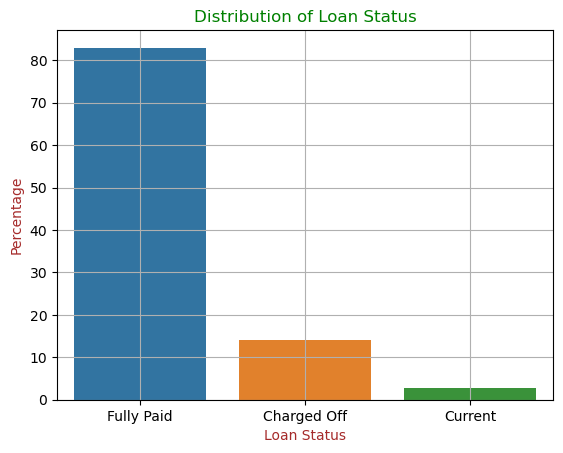

In [145]:
loan_status = df.loan_status.value_counts(normalize=True) * 100
sns.barplot(x=loan_status.index, y=loan_status.values)

plt.title("Distribution of Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Percentage", color="brown")

plt.grid(True)

plt.show()

- 85% individuals have paid there loans
- 15% people have been charged off
- 5% loans are active.

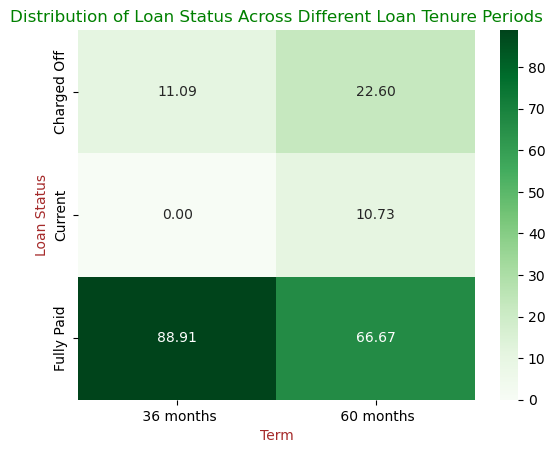

In [116]:
data = pd.crosstab(df["loan_status"], df["term"], normalize="columns") * 100

sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Tenure Periods", color="green")
plt.xlabel("Term", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Shorter loan tenures have a higher rate of being fully paid off. In contrast, longer loan tenures have a higher rate of being defaulters.
> The analysis indicates that loans with longer tenures tend to be riskier, as the percentage of defaults doubles with extended repayment periods.

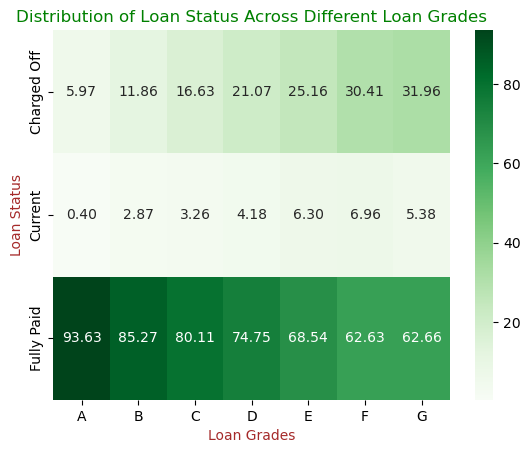

In [117]:
data = pd.crosstab(df["loan_status"], df["grade"], normalize="columns") * 100

sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Grades", color="green")
plt.xlabel("Loan Grades", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Loan grades A and B have the highest percentile of fully paid loans, indicating lower risk and higher repayment success. As the grades decline from A to G, the number of fully paid loans decreases, while charged-off loans increase, showing higher risk for lower-grade loans (eg. F, G). 
> Analysis shows that higher-grade loans are more reliable, while lower-grade loans carry greater risk and are more likely to default.

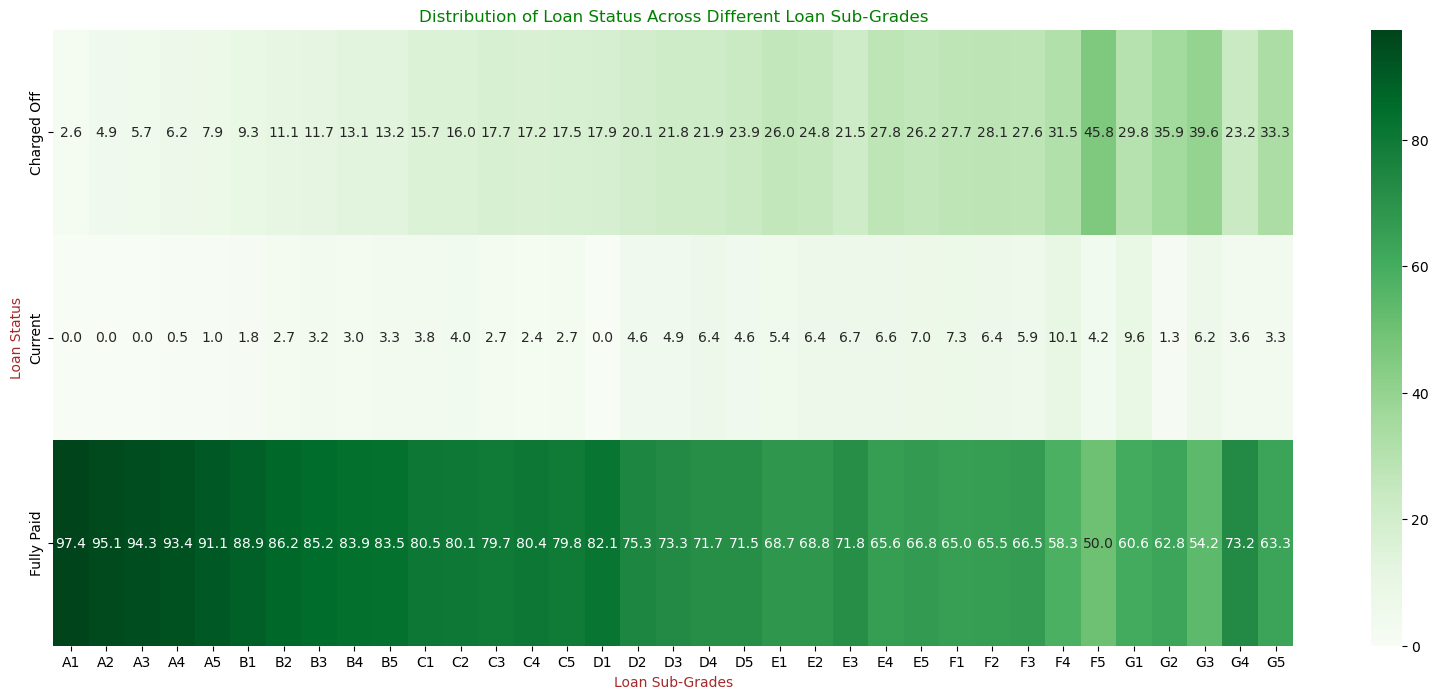

In [121]:
data = pd.crosstab(df["loan_status"], df["sub_grade"], normalize="columns") * 100

plt.figure(figsize=[20, 8])
sns.heatmap(data, annot=True, fmt=".1f", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Sub-Grades", color="green")
plt.xlabel("Loan Sub-Grades", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Higher sub-grades (A1 to B5) have more fully paid loans, while lower sub-grade (F5, G3, G5) show an increase in charged-off loans. 
> This pattern indicates that loans with higher sub-grades are generally repaid more successfully, whereas lower sub-grades have a higher risk of default.

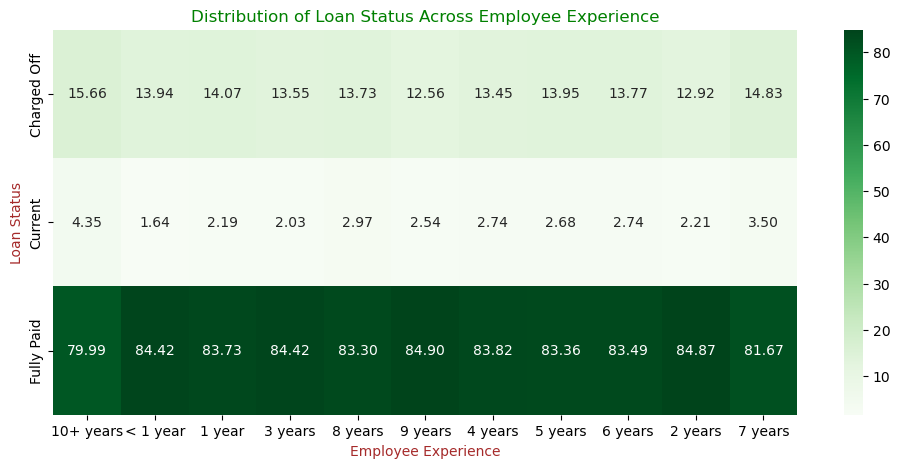

In [122]:
data = pd.crosstab(df["loan_status"], df["emp_length"], normalize="columns") * 100

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Employee Experience", color="green")
plt.xlabel("Employee Experience", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Employees with 9 years of experience have the highest number of fully paid loans. Except for those with 10+ years of experience, others are more likely to repay their loans. However, the proportion of charged-off loans is significantly lower across all experience levels, while employees with 10+ years of experience are more likely to have charged-off loans. 
> This suggests a weak positive correlation between employee tenure and loan repayment responsibility, indicating that employee experience alone may not reliably predict the risk level of loan repayment.

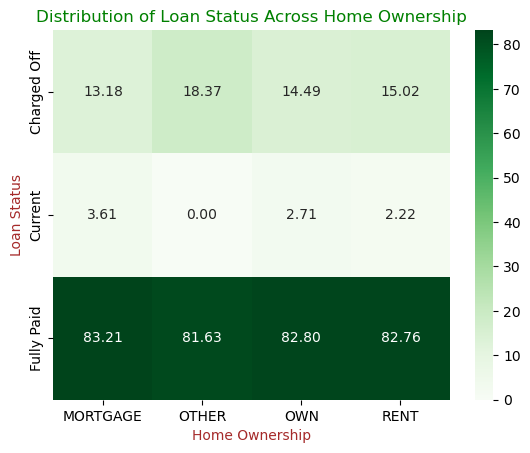

In [124]:
data = pd.crosstab(df["loan_status"], df[df.home_ownership != "NONE"]["home_ownership"], normalize="columns") * 100

sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Home Ownership", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Home ownership is strongly correlated with loan repayment. Others have the highest number of charged-off loans, while homeowners (mortgage and own) and Rent have significantly lower charge-off rates and higher fully paid loan. 
> This suggests that home ownership has a significant impact on loan repayment behavior. Individuals with "Other" home ownership status are more risky and are more likely to default on their loans.

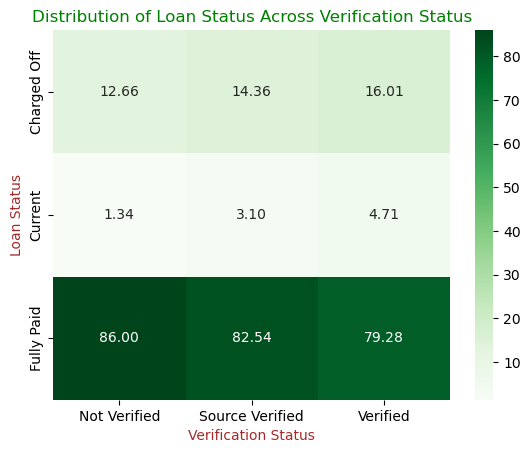

In [125]:
data = pd.crosstab(df["loan_status"], df["verification_status"], normalize="columns") * 100

sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Verification Status", color="green")
plt.xlabel("Verification Status", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Verification status shows a strong correlation with loan repayment outcomes. Non-verified individuals exhibit the highest fully paid loans. In contrast, loans with verified sources have the highest incidence of being charged off. 
> This suggests that verification status significantly impacts loan outcomes. Individuals who are verified appear to be riskier and more likely to default compared to others.

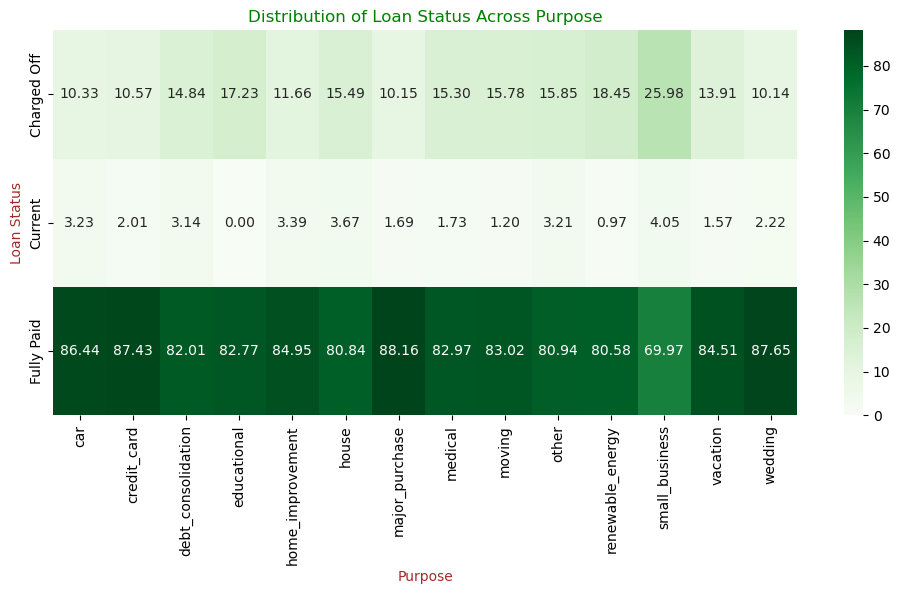

In [126]:
data = pd.crosstab(df["loan_status"], df["purpose"], normalize="columns") * 100

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Purpose", color="green")
plt.xlabel("Purpose", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Individuals who take loan for wedding, major purchase, credit card or car are most likely to repay the loan. Thus Purpose is strongly related to loan status.
> Individuals who took loans for small business or education purposes are riskier and more likely to default.

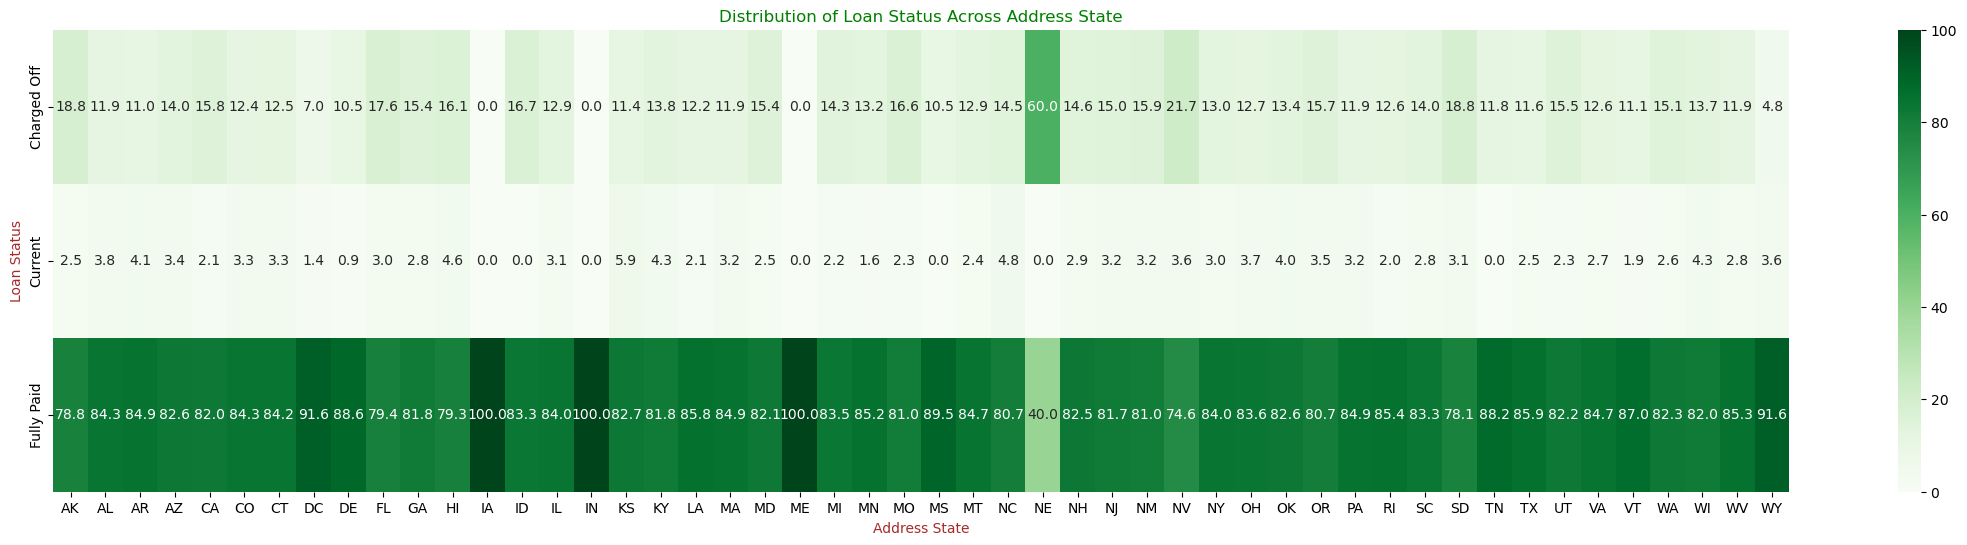

In [131]:
data = pd.crosstab(df["loan_status"], df["addr_state"], normalize="columns") * 100

plt.figure(figsize=[28, 6])
sns.heatmap(data, annot=True, fmt=".1f", cmap="Greens")

plt.title("Distribution of Loan Status Across Address State", color="green")
plt.xlabel("Address State", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- The heatmap indicates that loans in IA, IN, ME have the highest percentage of being fully paid with zero defaulters, while NV shows the highest charge-off rate.
> Individuals from IA, IN, and ME are highly likely to repay their loans. However, individuals from NE present a higher risk and are more likely to default.

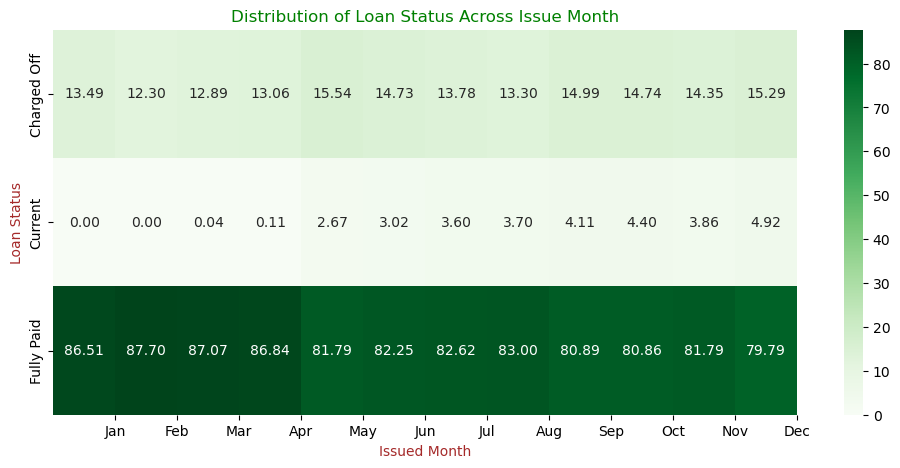

In [133]:
data = pd.crosstab(df["loan_status"], df["issue_date"].dt.month, normalize="columns") * 100

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Issue Month", color="green")
plt.xlabel("Issued Month", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.show()

- The month in which a loan is issued slightly influences repayment behavior. Loans issued between January and April tend to have higher repayment rates, while those issued in May are more likely to be charged off. However, month-to-month variations exist, suggesting other factors influence repayment outcomes
> Default are similar across all months, so the loan issue date isn't a reliable indicator of whether a borrower is at higher risk of defaulting

In [65]:
df.annual_inc.min()

4000.0

In [66]:
df.annual_inc.max()

6000000.0

In [67]:
bins = [4000, 10000, 50000, 100000, 500000, 1000000, 6000000]

# Define labels for the bins
labels = ["4k-10k", "10k-50k", "50k-100k", "100k-500k", "500k-1M", "1M-6M"]

# Create a new column 'annual_inc_category' with the annual income categories
df["annual_inc_category"] = pd.cut(df["annual_inc"], bins=bins, labels=labels, include_lowest=True)

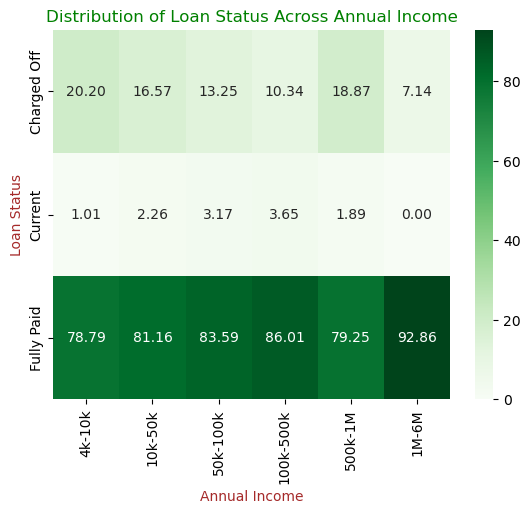

In [134]:
data = pd.crosstab(df["loan_status"], df["annual_inc_category"], normalize="columns") * 100

sns.heatmap(data, annot=True, fmt=".2f", cmap="Greens")

plt.title("Distribution of Loan Status Across Annual Income", color="green")
plt.xlabel("Annual Income", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

- Higher annual income is strongly correlated with better loan repayment. Borrowers with incomes between 1M-6M have significantly higher fully paid loan rates. Borrowers with income between 4k-10k and 500k-1M have significantly higher charged-off loans. Income level is a key factor influencing loan repayment behavior.
> Accepting loans of individuals whose annual income ranges between 4k-10k are more riskier and are likely to be default wheras individuals with annual income above 1M are likely to repay loan.

#### Analyzing Different Numerical Columns over Loan Status

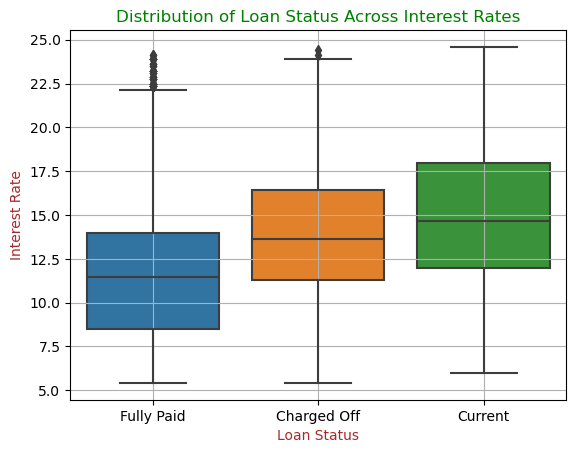

In [69]:
sns.boxplot(x="loan_status", y="int_rate", data=df)

plt.title("Distribution of Loan Status Across Interest Rates", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Interest Rate", color="brown")

plt.grid(True)

plt.show()

- Interest rate significantly impacts loan status. Higher interest rates are associated with a larger proportion of charged-off loans and a smaller proportion of fully paid loans. This suggests a strong correlation between interest rate and loan repayment risk
> Higher rate of interest have higher chance people get default.

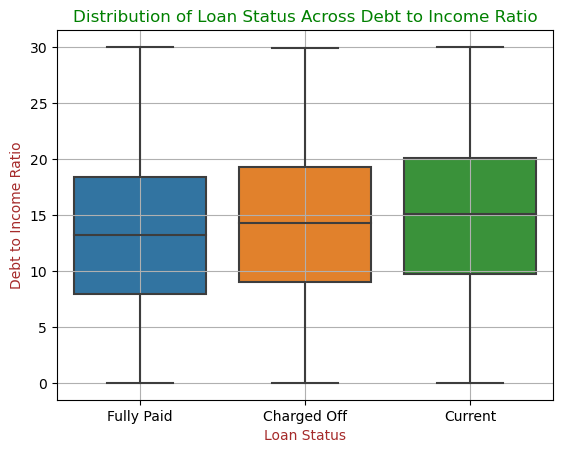

In [70]:
sns.boxplot(x="loan_status", y="dti", data=df)

plt.title("Distribution of Loan Status Across Debt to Income Ratio", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Debt to Income Ratio", color="brown")

plt.grid(True)

plt.show()

> Higher debt-to-income ratio is associated with a slightly greater likelihood of loan default. Borrowers with lower debt-to-income ratios have a higher proportion of fully paid loans and a lower proportion of charged-off loans. This suggests a slightly strong correlation between debt-to-income ratio and loan repayment risk.

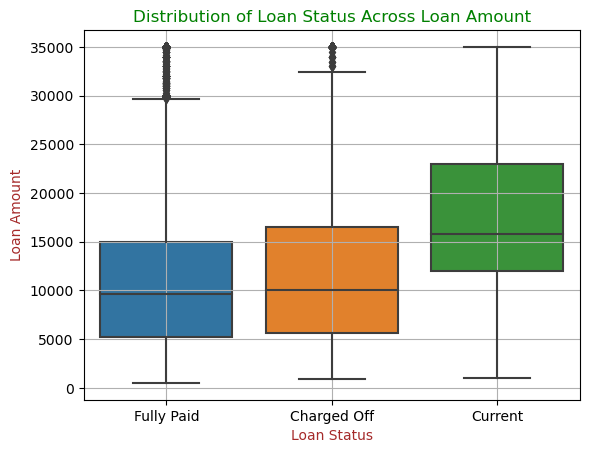

In [72]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

plt.title("Distribution of Loan Status Across Loan Amount", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Loan Amount", color="brown")

plt.grid(True)

plt.show()

> Loan amount significantly impacts repayment behavior. Higher loan amounts are associated with a greater likelihood of loan default. Borrowers with lower loan amounts have a higher proportion of fully paid loans and a lower proportion of charged-off loans. This suggests a strong correlation between loan amount and loan repayment risk.

##### Analysis of Loan Status over multi categories

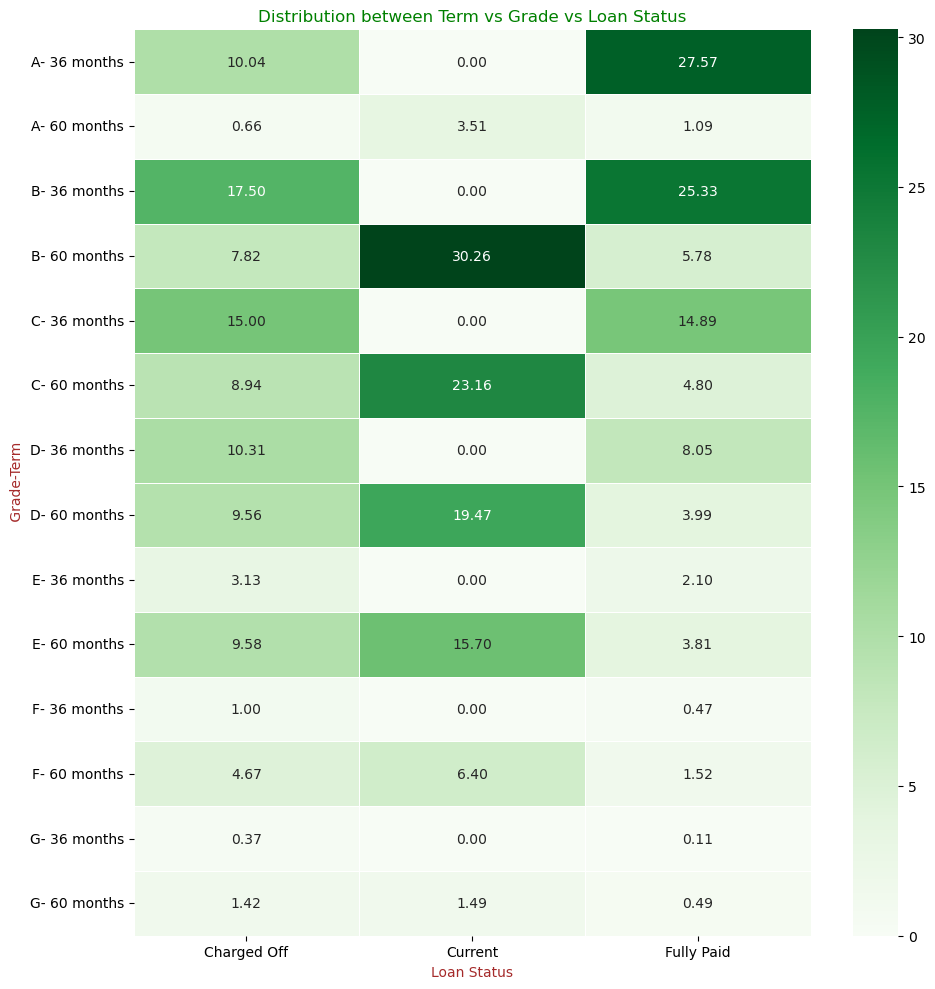

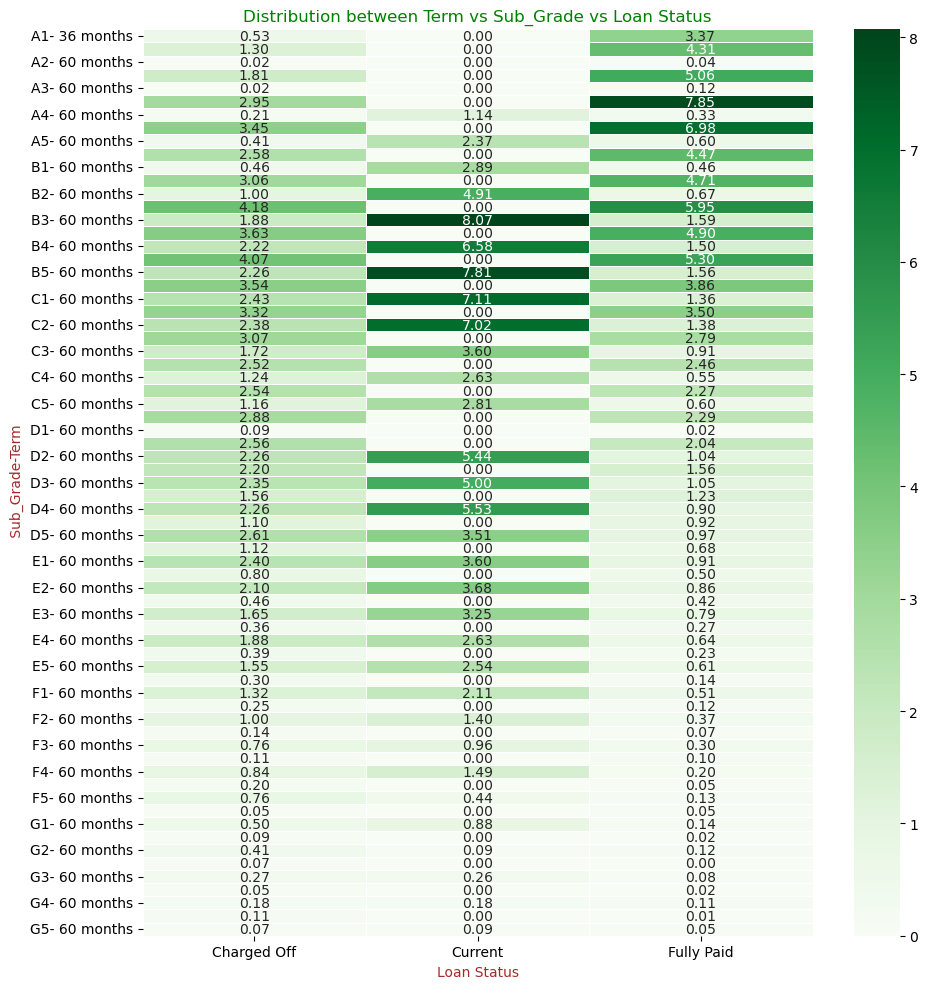

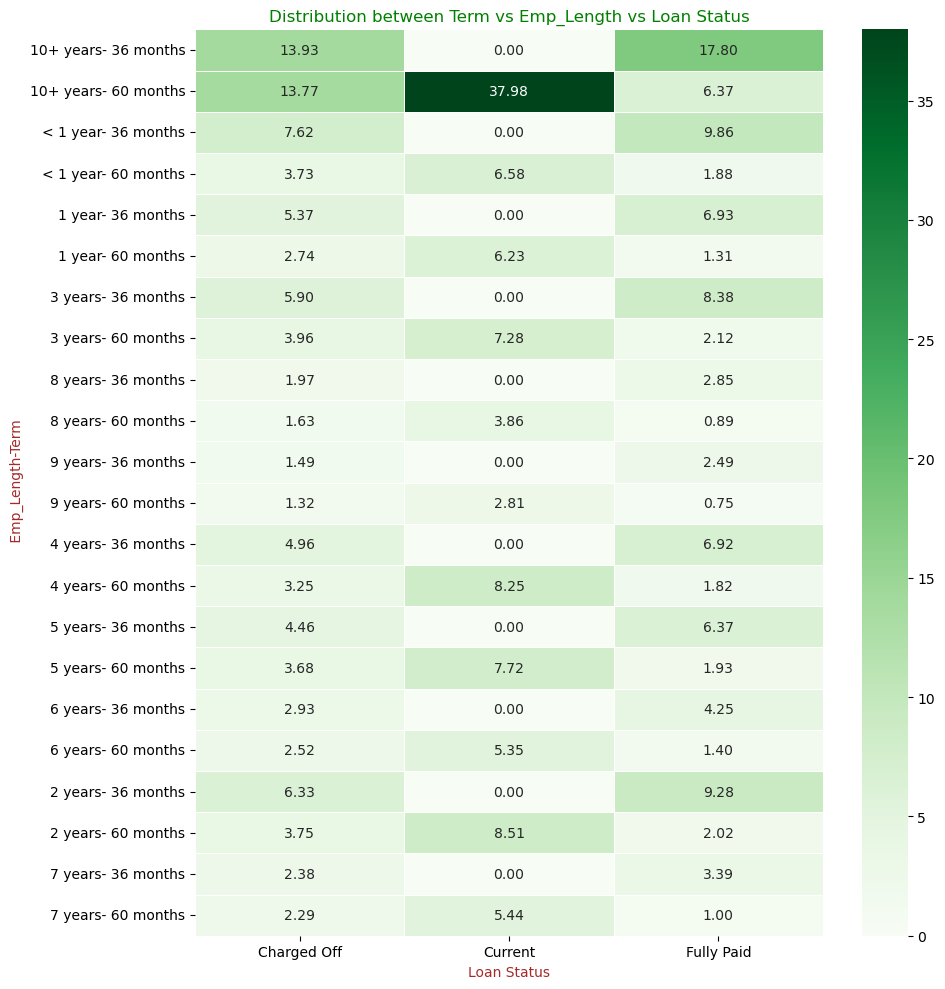

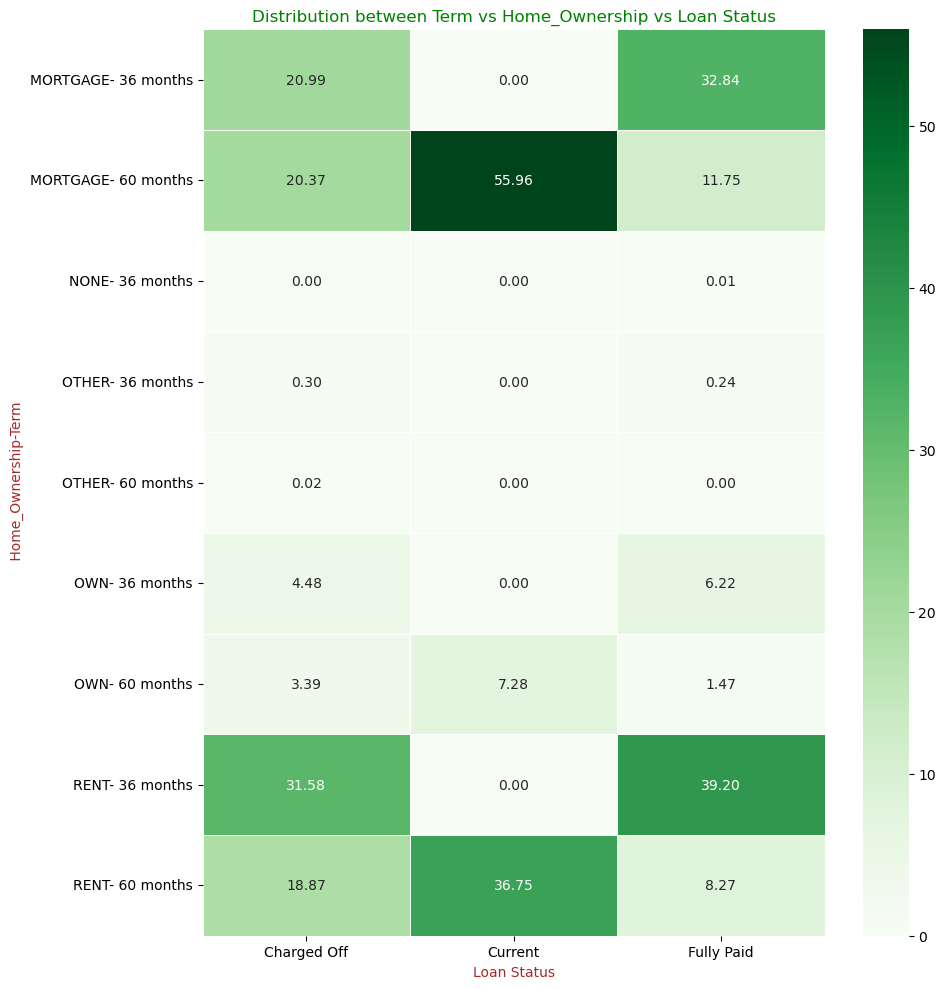

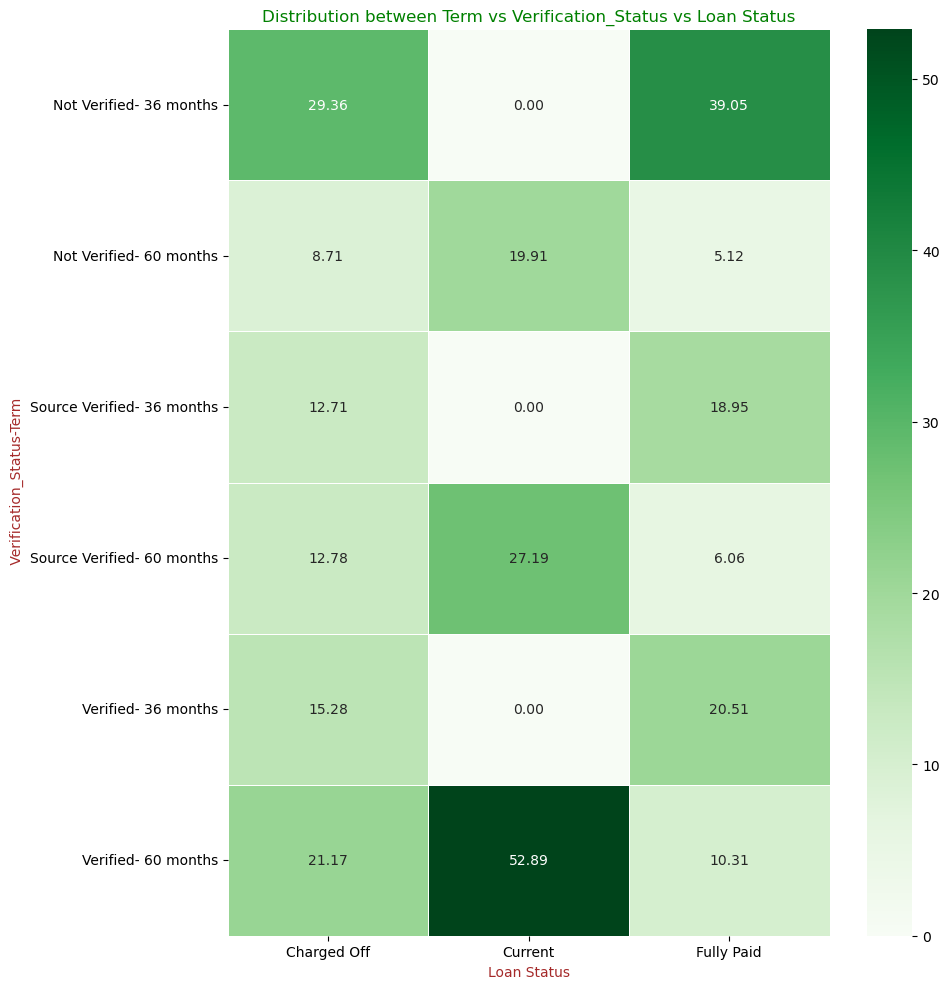

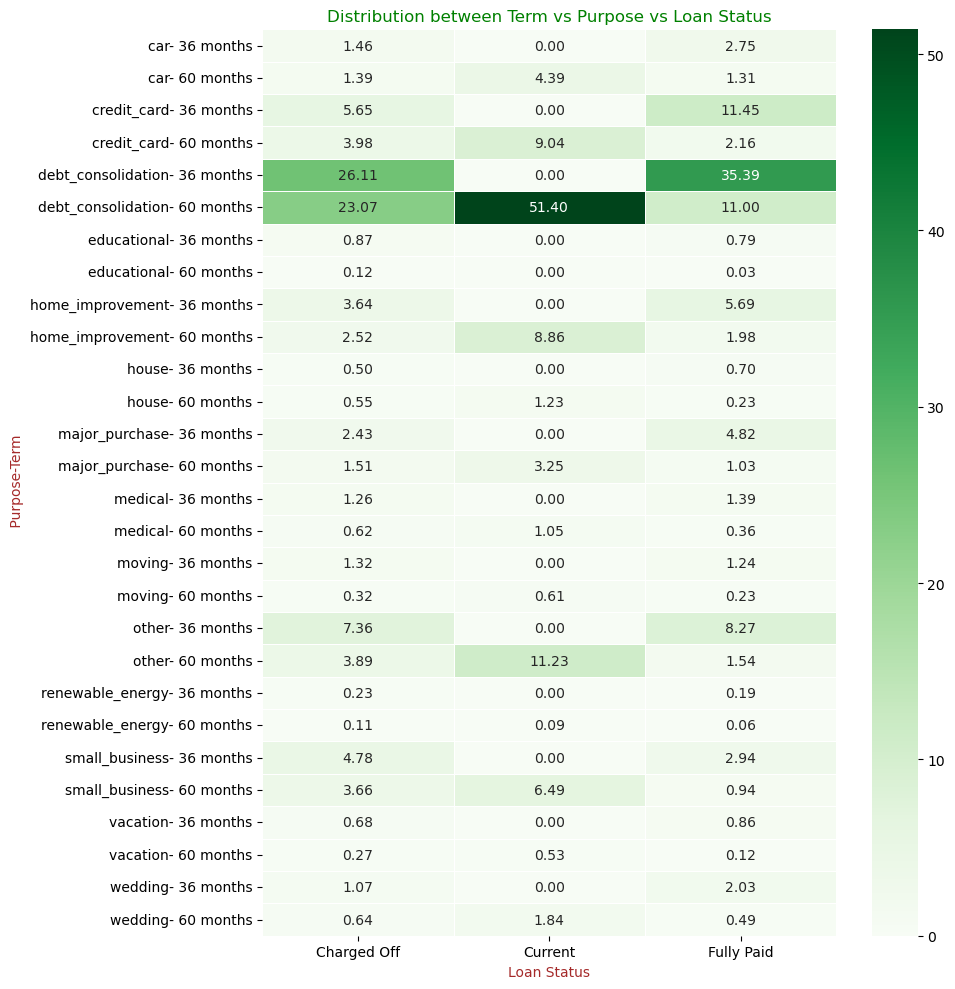

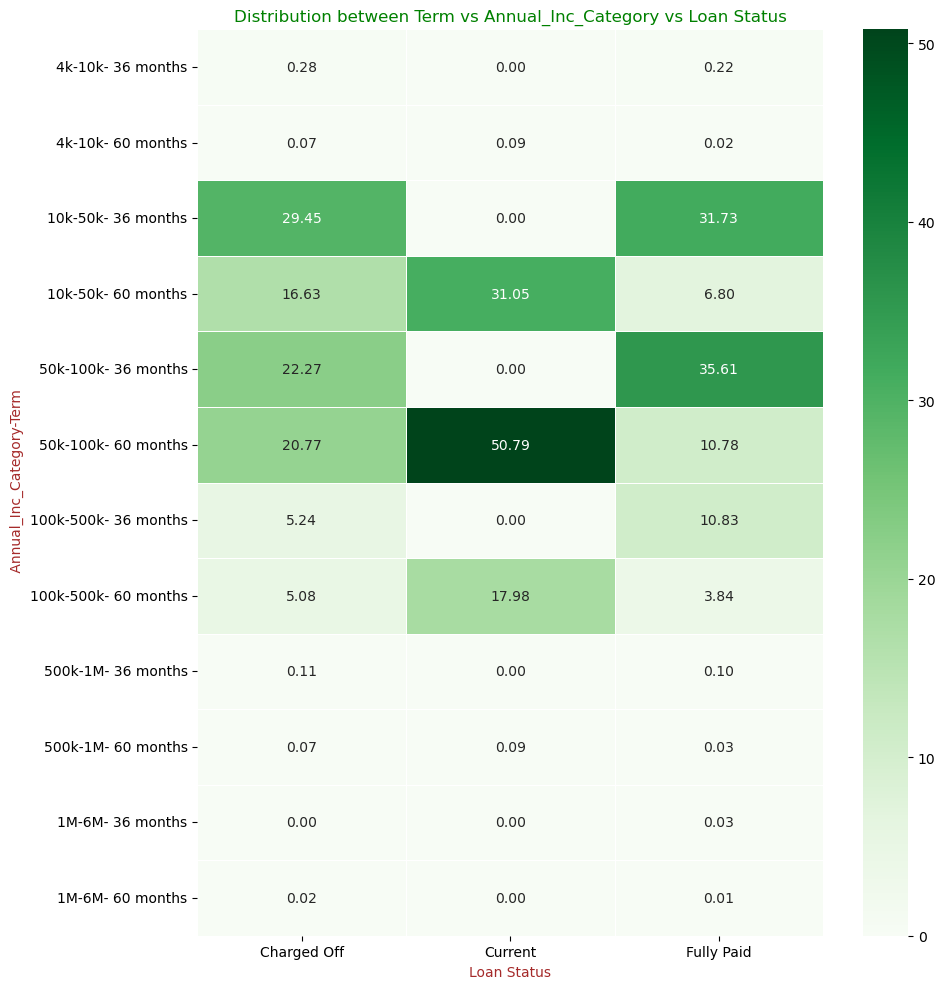

In [148]:
for column in ["grade", "sub_grade",  "emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["term", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "term"], columns="loan_status", values="Count", fill_value=0)
    
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

    plt.title(f"Distribution between Term vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Term", color="brown")

    plt.tight_layout()
    plt.show()

- Tenure:
    - Grade A, B with shorter tenure of 36 months experienced higher Full Paid loan wheres grade B, C with tenure of 36 months are more likely to charged off
        > With respect to ongoing loan, loan grade B, C, D, E with bigger tenure are riskier and are likely to default since from past records we can see charge off percentage is greater than person who paid loan.
    - Sub-grade A3, A4 with larger tenure of 60 months experienced Fully Paid Loans wheres sub-grade B4 with larger tenure i.e 60 months are more likely to charged off.
        > With respect to ongoing loan, loan grades B3, B5, C1, C2 are more riskier and likely to be default since from past records we can see charge off percentage is greater than person who paid loan.
    - Individuals with 10+ years of experience with shorter tenure are most likely to fully pay the loan, but for longer tenure we charge off rate is more.
        > With respect to ongoing loan, individuals with 10+ years of experience for larger tenure period are more riskier and are most likely to default.
    - Individuals staying in Rent and short loan tenure are most likely to fully pay the loan, but we see similar trend in charged off as well.
        > With respect to ongoing loan, individual with home ownership as Mortgage with longer tenure period and people who are rented with longer tenure period are risky and most likely to be default.
    - Individuals who are not verified but have shorter tenures exhibit a strong tendency to repay their loans and a moderately strong likelihood of experiencing a charge-off.
        > With respect to ongoing loan, individual irrespective of verification category and applied for longer tenure are more riskier and are likely to be default.
    - Individuals who have applied for debt consolidation for shorter tenure exhibit strong trend to repay the loan and a moderately strong likelihood of experiencing a charged-off.
        > With respect to ongoing loan, individual who have applied for credit card, debt consolidation, home improvement, small business and other pupose for larger tenure are more riskier and are likely to be default
    - Individuals earning 50k-100k for a shorter tenure loan are most likely to repay the loan while individuals earning 10k-50k  for a shorter tenure loan are most likely to get charged off.
        > With respect to ongoing loan, individual whose annual income ranges from 10k-50k, 50k-100k and 100k-500k have applied loan for longer tenure are more riskier and are likely to default.

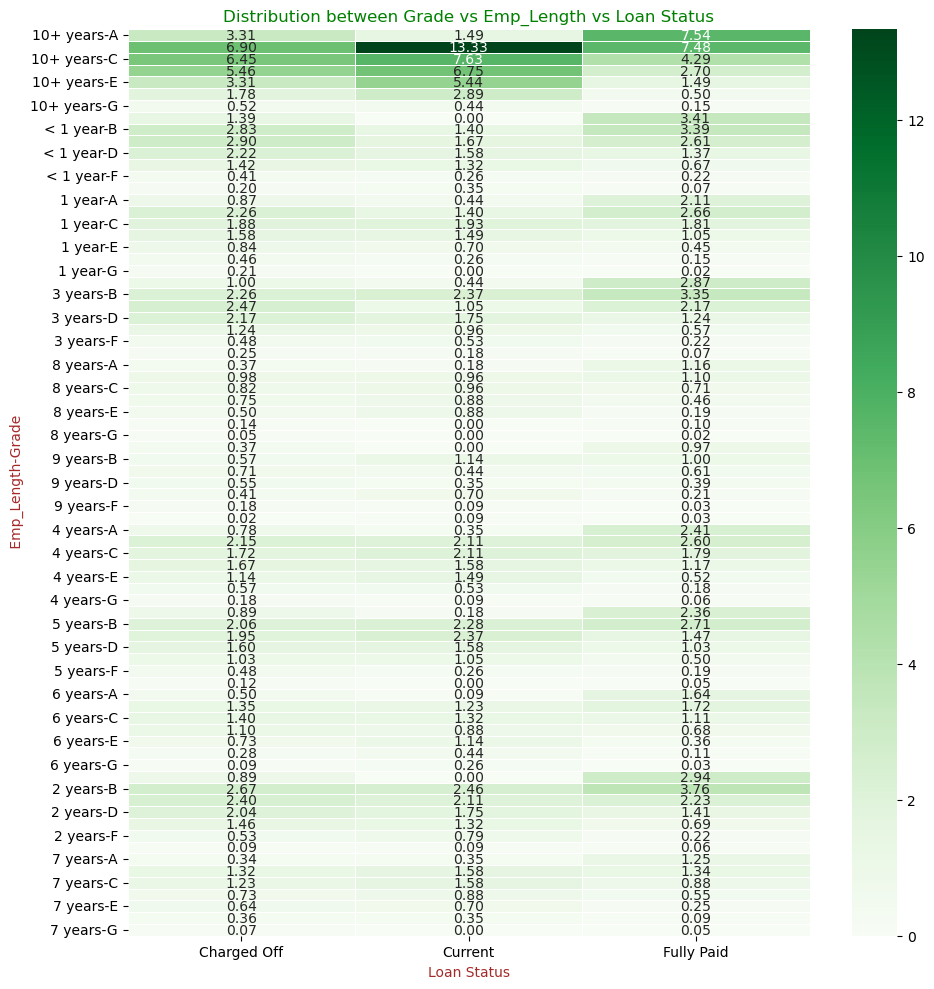

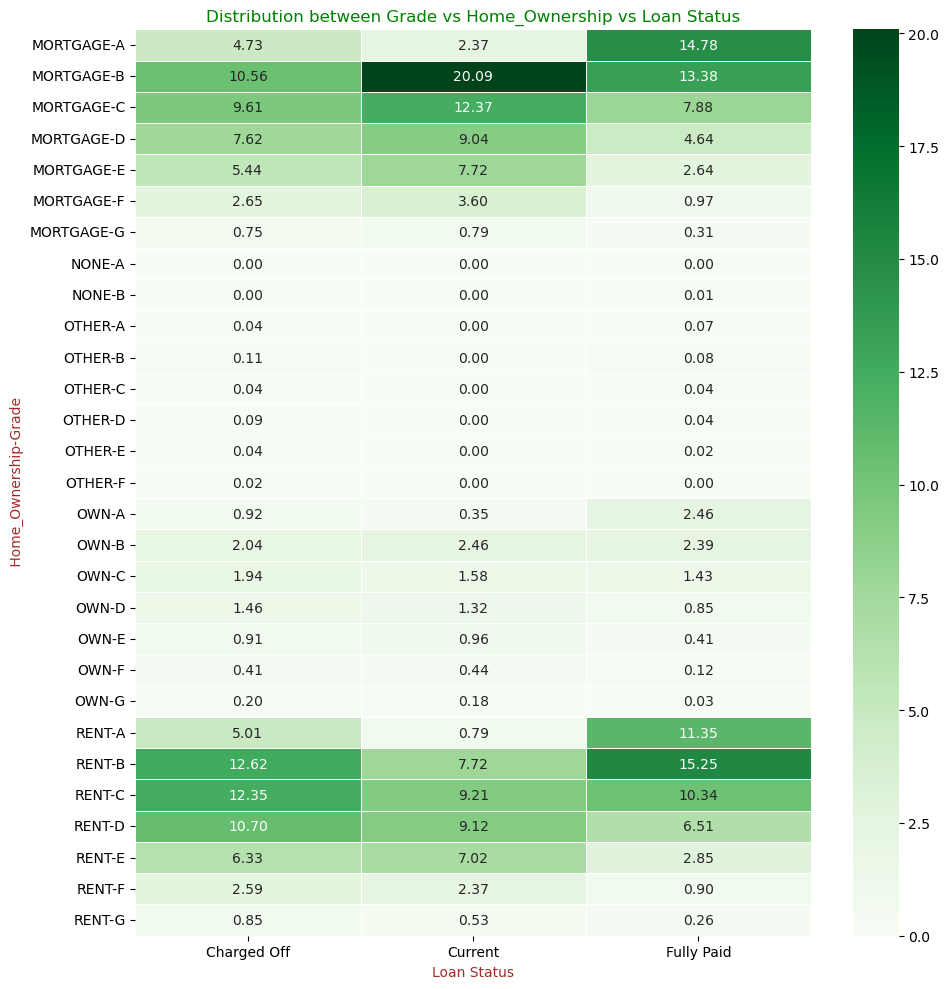

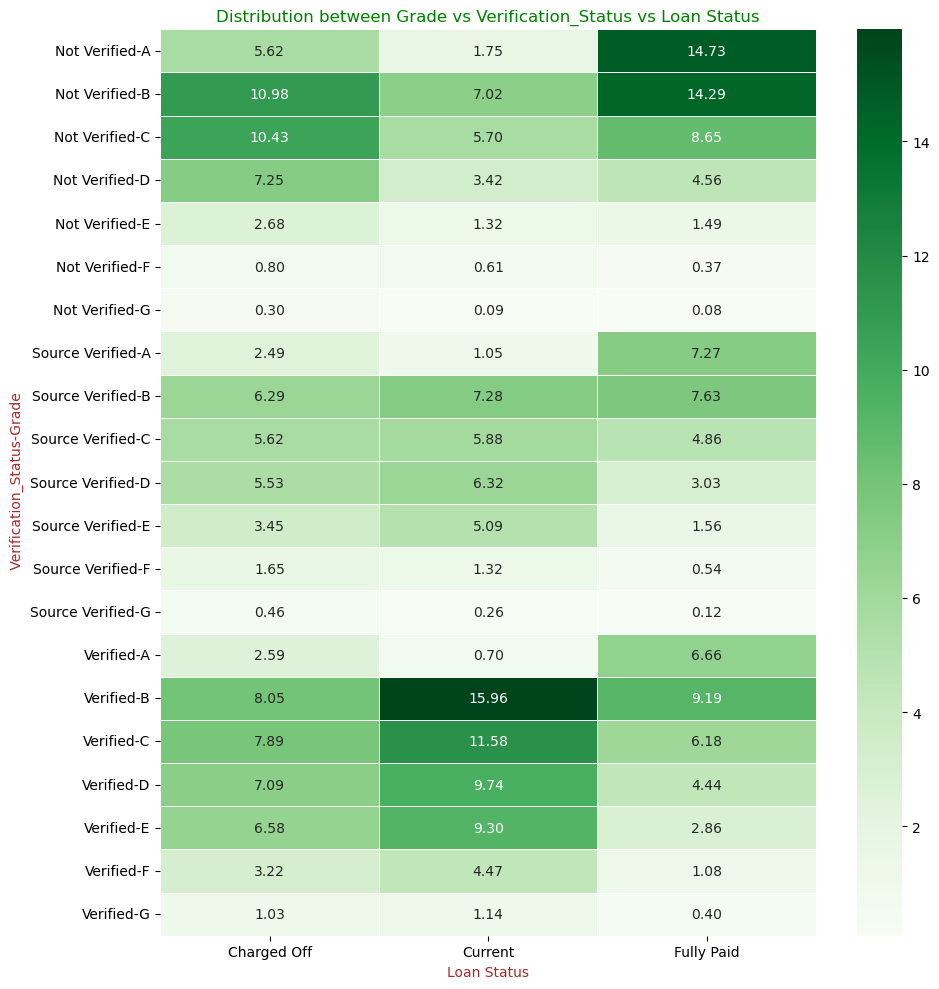

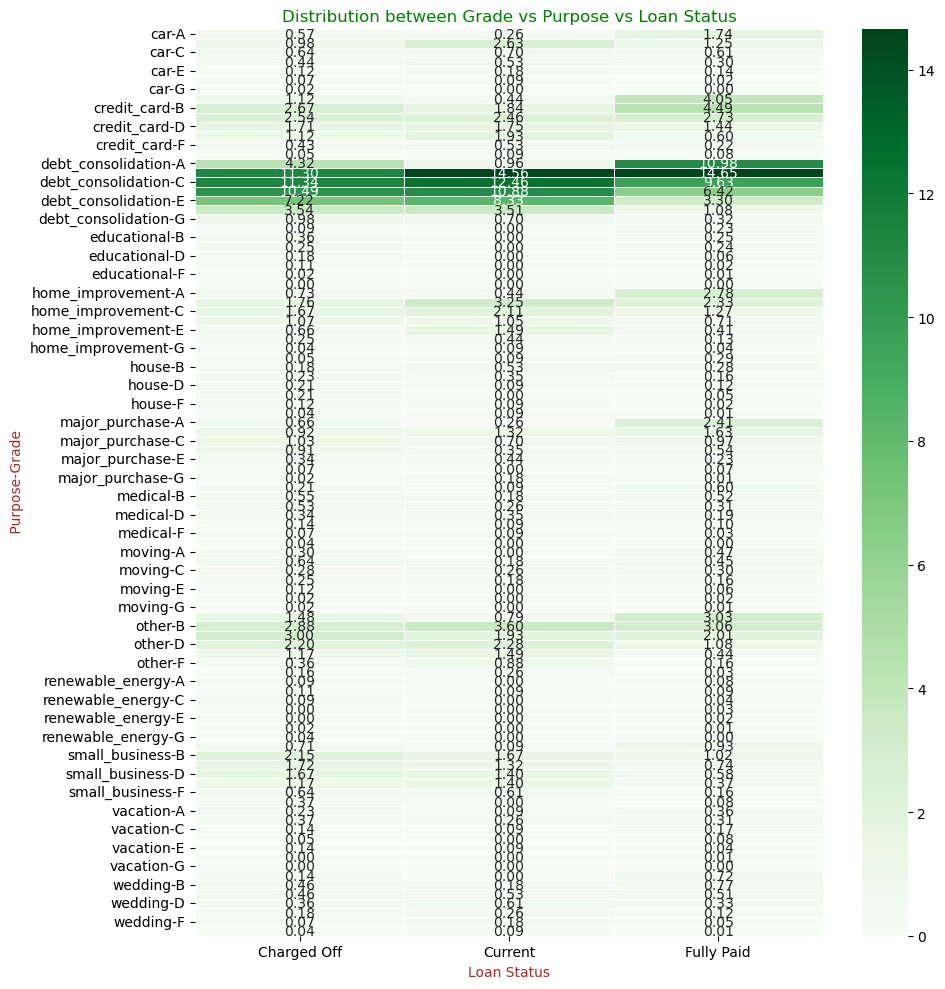

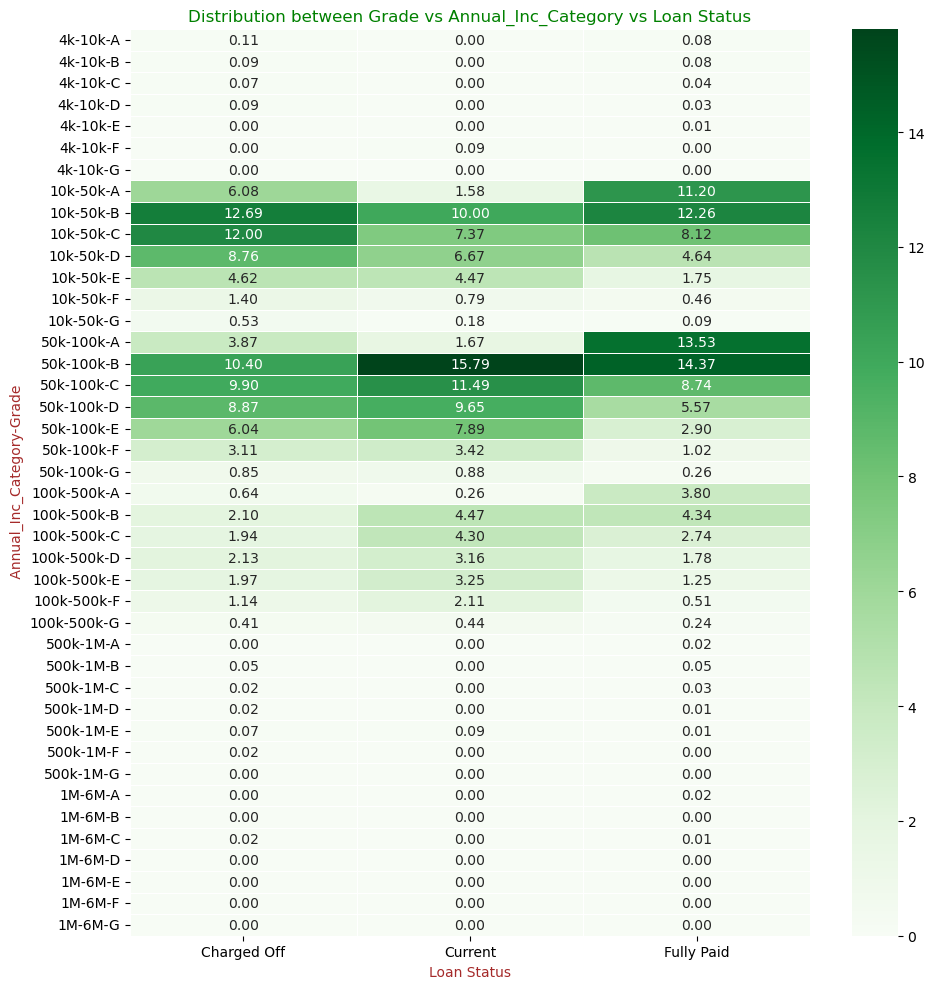

In [147]:
for column in ["emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["grade", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "grade"], columns="loan_status", values="Count", fill_value=0)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

    plt.title(f"Distribution between Grade vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Grade", color="brown")

    plt.tight_layout()
    plt.show()

- Grade:
    - Individuals with 10+ years of experience with grade A exhihit strong tendency to repay the loan and moderately strong likelihood to get charged off.
        > With respect to ongoing loan, individuals with 10+ years of experience with loan grade C, E, G are riskier and are likely to default since from past records we can see charge off percentage is greater than person who paid loan.
    - Individuals who stay in Rent and have loan grade B exhihit strong tendency to repay the loan and moderately strong likelihood to get charged off.
        > With respect to ongoing loan, individuals for loan grade B to E for Mortgage and for loan grade C to E for Rented are riskier and are likely to default.
    - Individuals who are not Verified for loan grade A, B shows strong trend to repay the loan. Individual who are not verified and have loan grade B, C are most likely to get charged off.
        > With respect to ongoing loan, individuals for loan grades C, D, E Source verifed and for loan grades C, D, E are riskier and are likely to default.
    - Individuals who have applied for debt consolidation for loan grade A exhibit strong trend to repay the loan and  individuals who have applied for debt consolidation for loan grade C moderately strong likelihood of experiencing a charged-off.
        > With respect to ongoing loan, individuals for loan grade A debt consolidation is highly likely to pay the loan whereas grades C, E, G for debt consolidation are riskier and are likely to default.
    - Individuals earning 50k-100k for loan grade B are most likely to repay the loan while individuals earning 10k-50k for same loan grade B are most likely to get charged off.
        > With respect to ongoing loan, individuals for loan grade B  earning 50k-100k are most likel to repay the loan whereas loan grades C, D, E earning 50k-100k are more riskier and are likely to default.

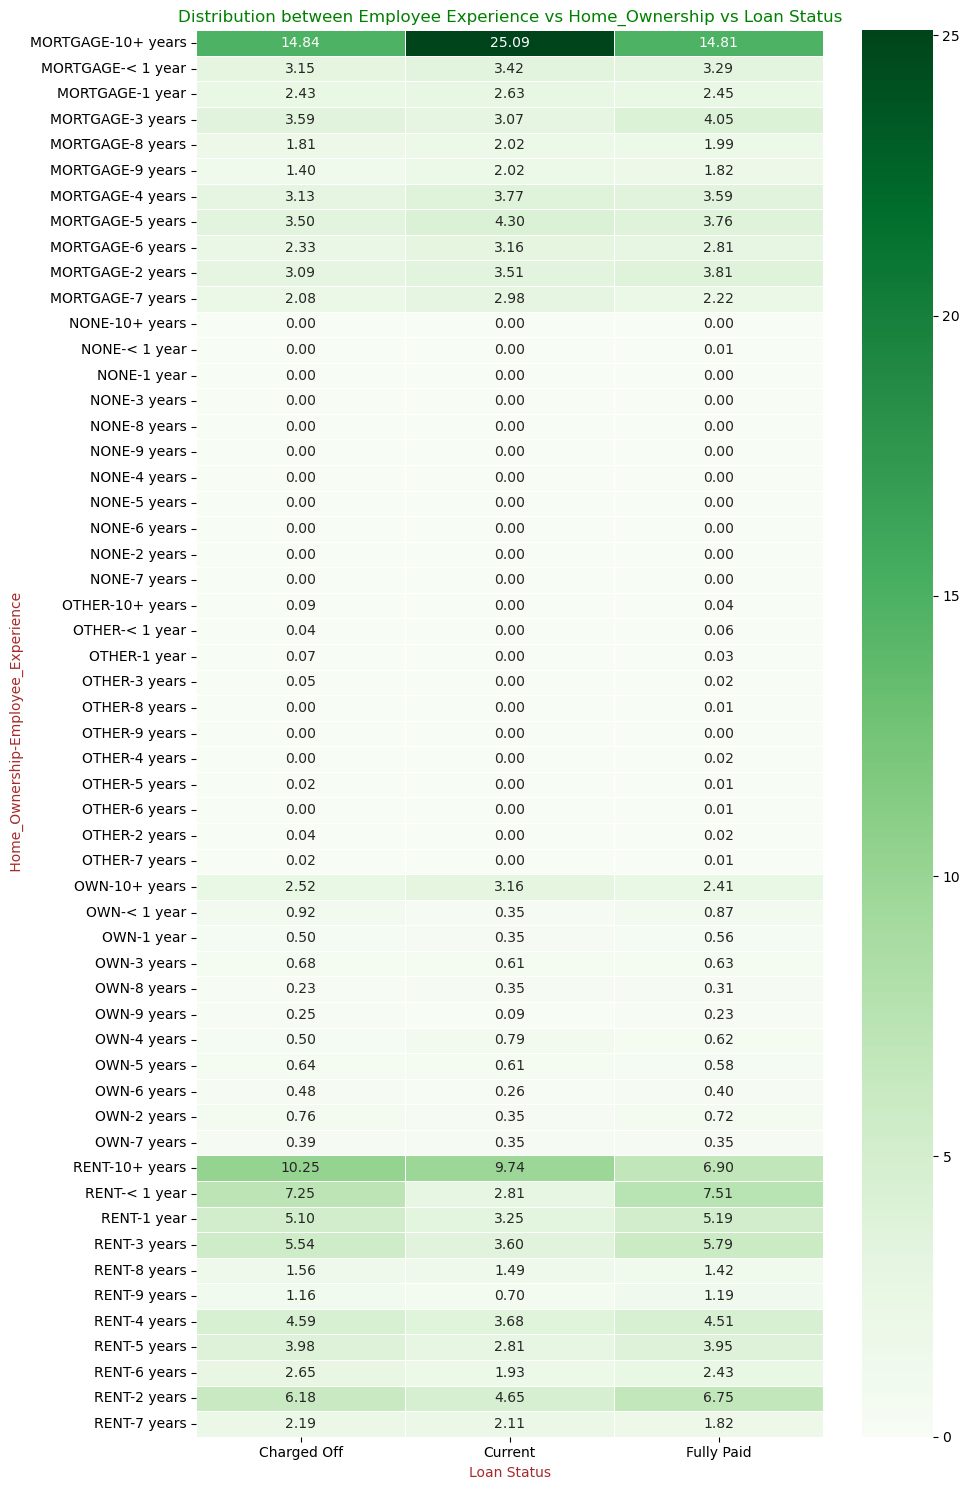

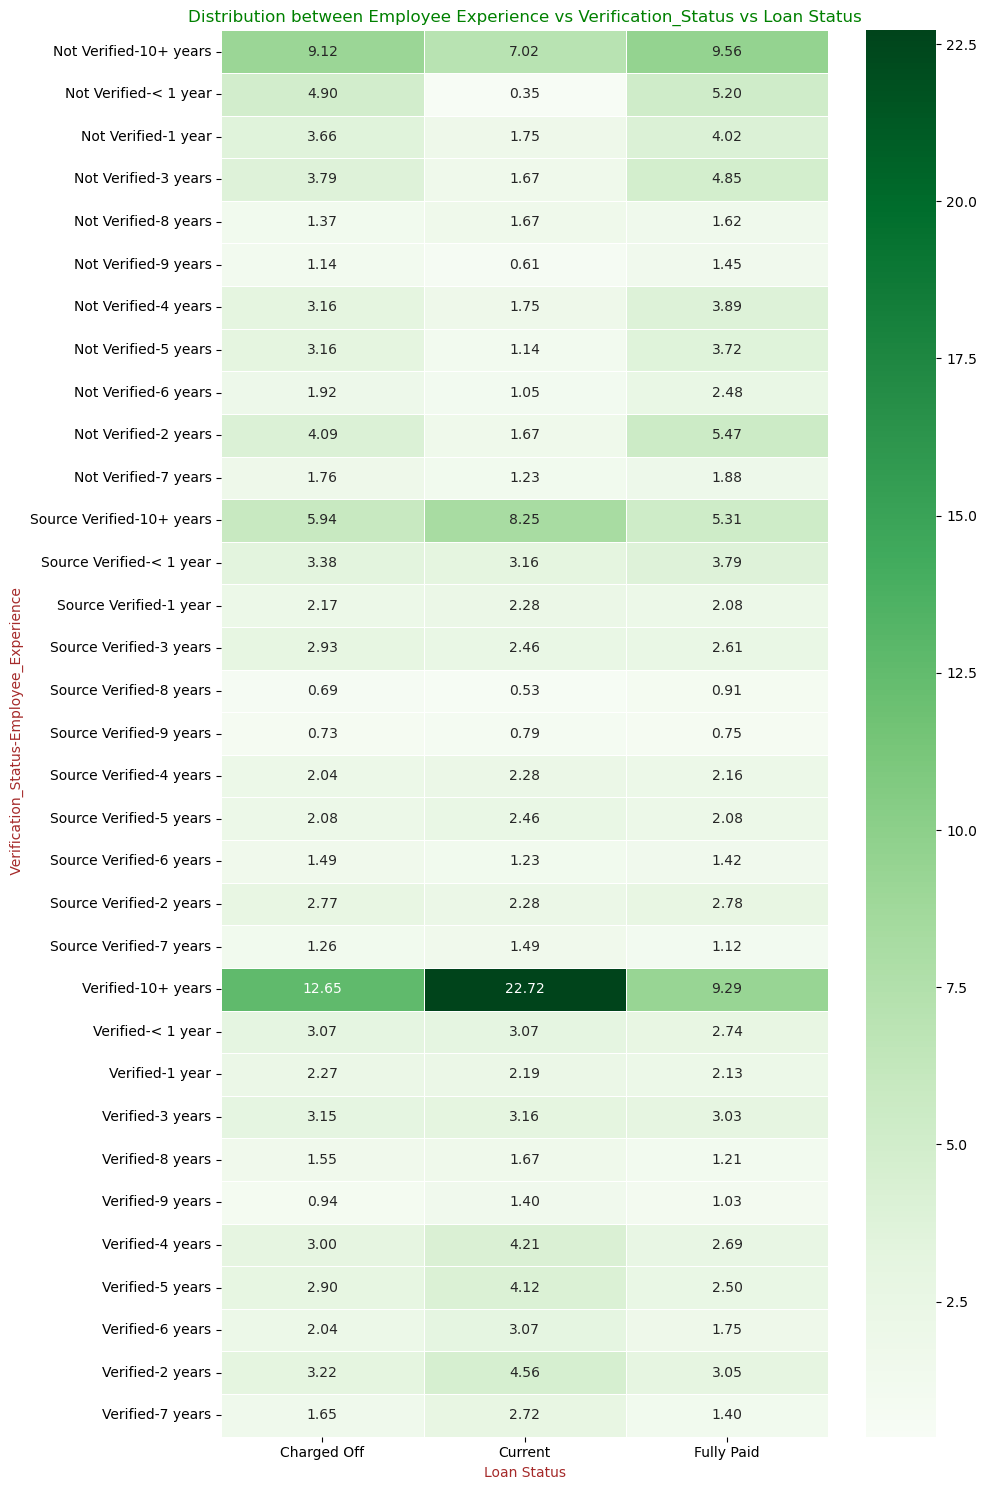

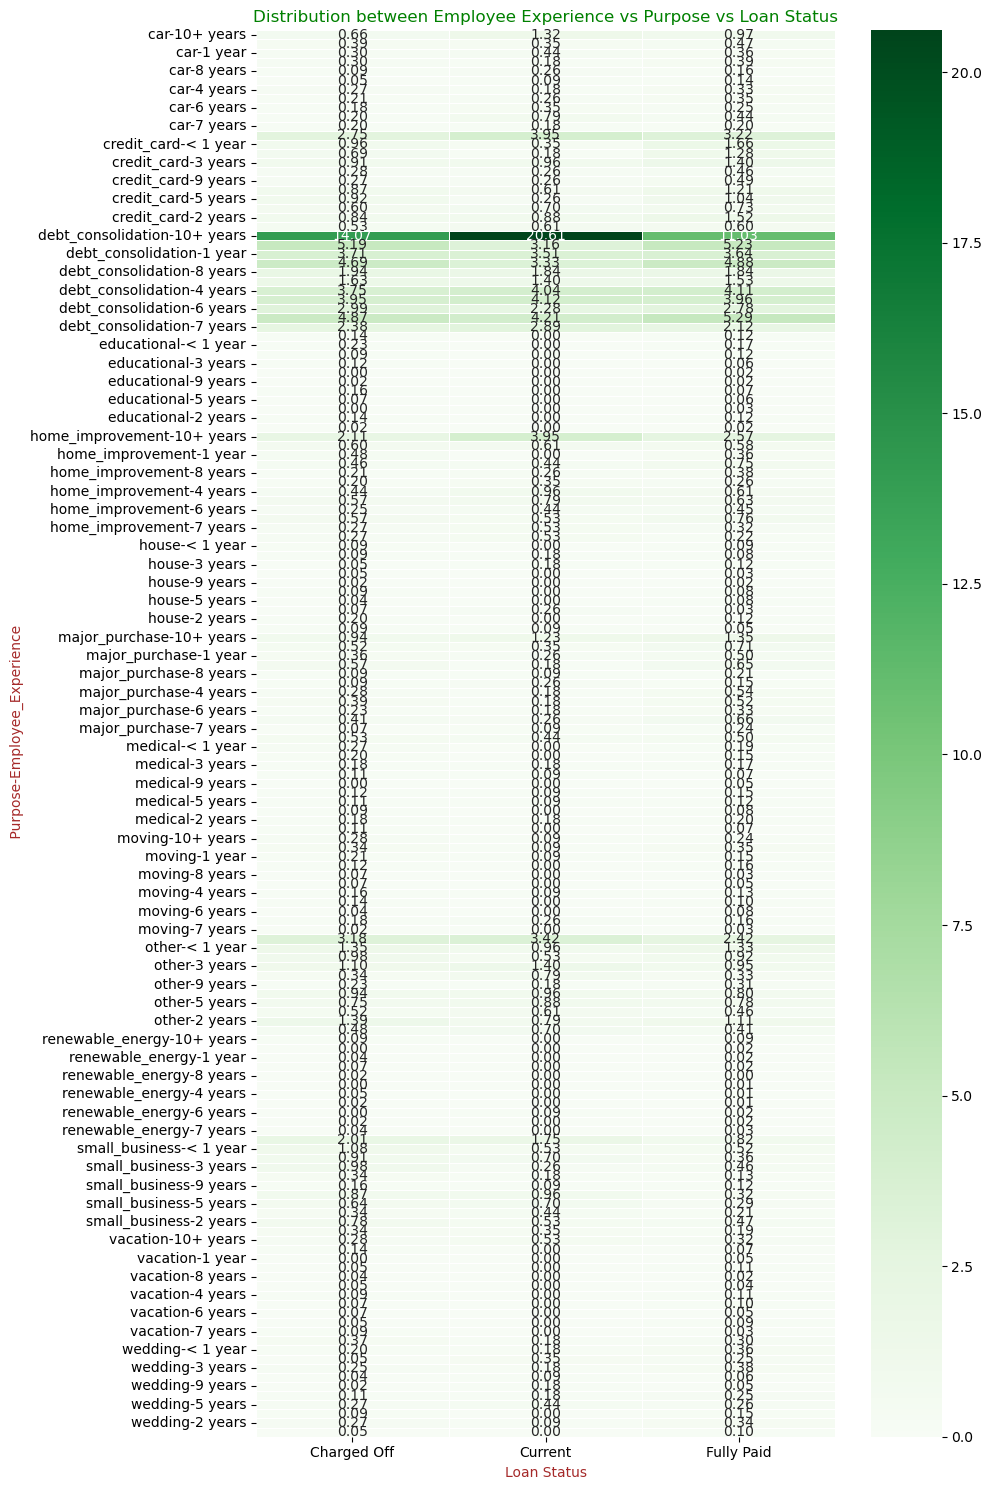

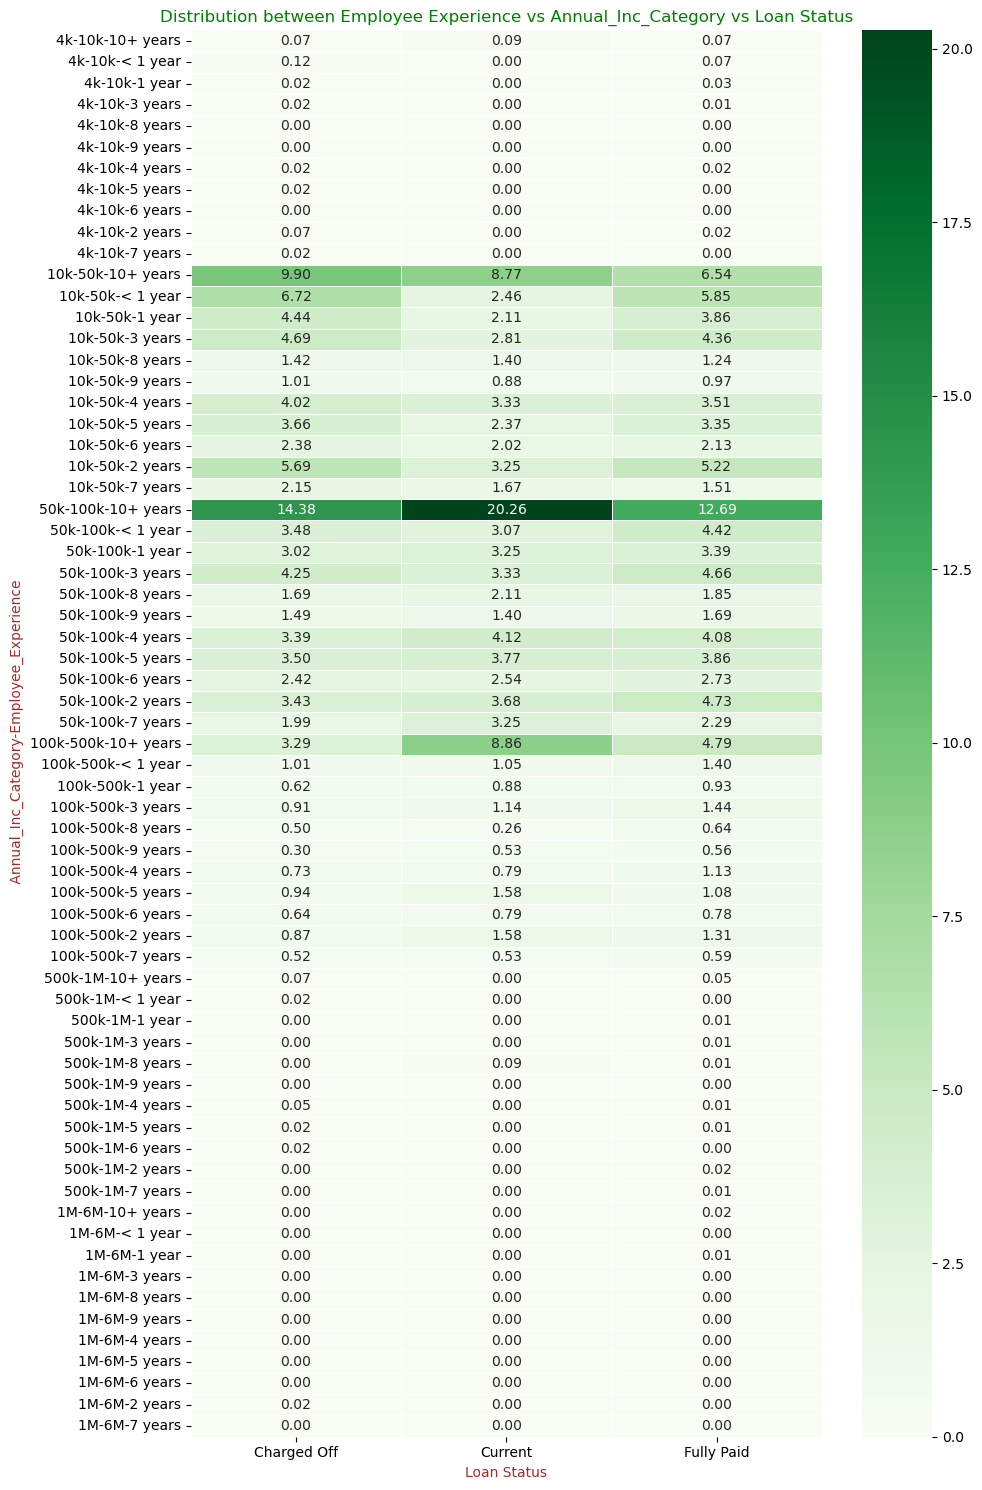

In [140]:
for column in ["home_ownership", "verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["emp_length", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "emp_length"], columns="loan_status", values="Count", fill_value=0)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 15))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

    plt.title(f"Distribution between Employee Experience vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Employee_Experience", color="brown")

    plt.tight_layout()
    plt.show()

- Employee Experience:
   - Individuals with over 10 years of experience who own a home with a mortgage show a strong tendency to repay their loans and a strong likelihood of experiencing a charge-off as well.
       > With respect to ongoing loan, individuals with 10+ years of experience and are rented are most riskier and are likely to default and also there is a small possibility of individuals with 10+ years of experience with Mortgage property might get charged off 
    - Individuals who are not verified with 10+ years of experience shows strong trend to repay the loan. Individual who are verified with 10+ years of experience shows strong trend to get charged off.
        > With respect to ongoing loan, individuals with 10+ years of experience and are verified are most riskier and are most likely to be default.
    - Individuals with 10+ years of experience fo debt consolidation loan purpose are most likely to get charge-off also same category shows moderate likelihood of paying off the loan.
        > With respect to ongoing loan, individuals with 10+ years of experience for debt consolidation are riskier and are mosre likelihood to get default.
    - Individuals earning 50k-100k for employees with 10+ years of experience are less likely to repay the loan and strong likelihood of experiencing a charge-off.
        > With respect to ongoing loan, individuals with 10+ years of experience with 50k-100k annual income are riskier and are most likely to get charged off.

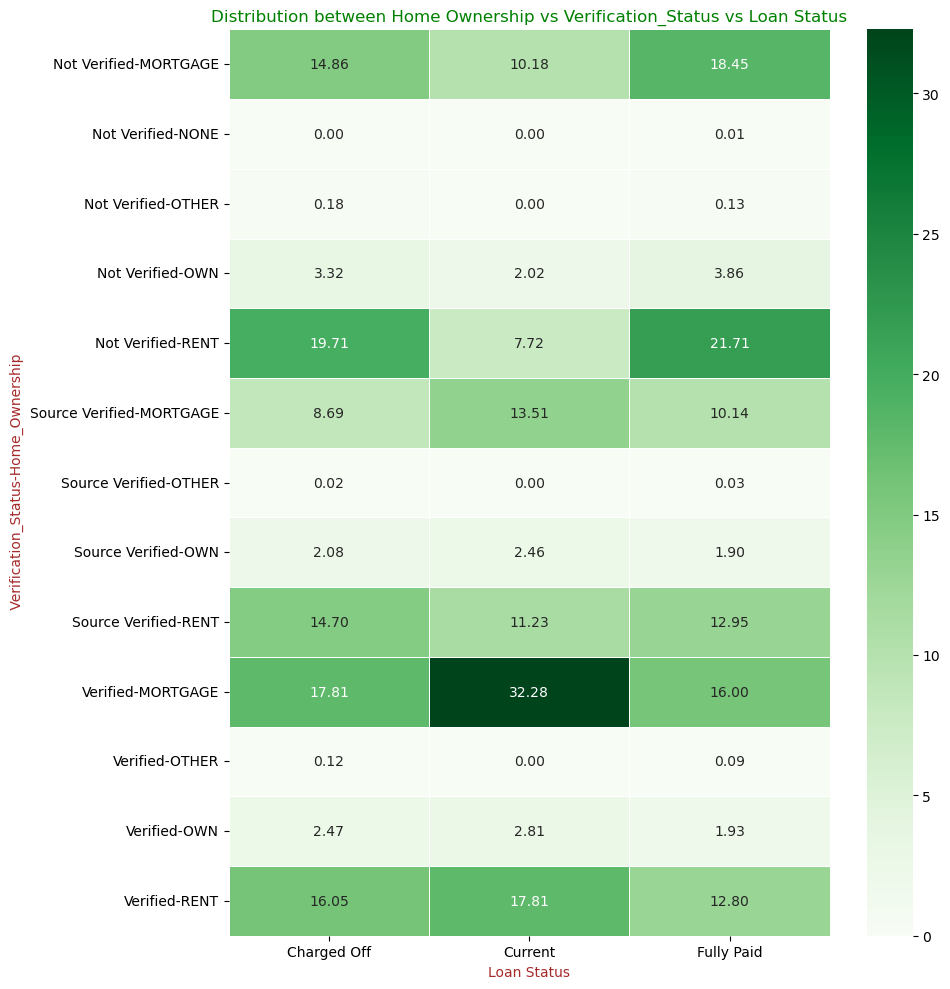

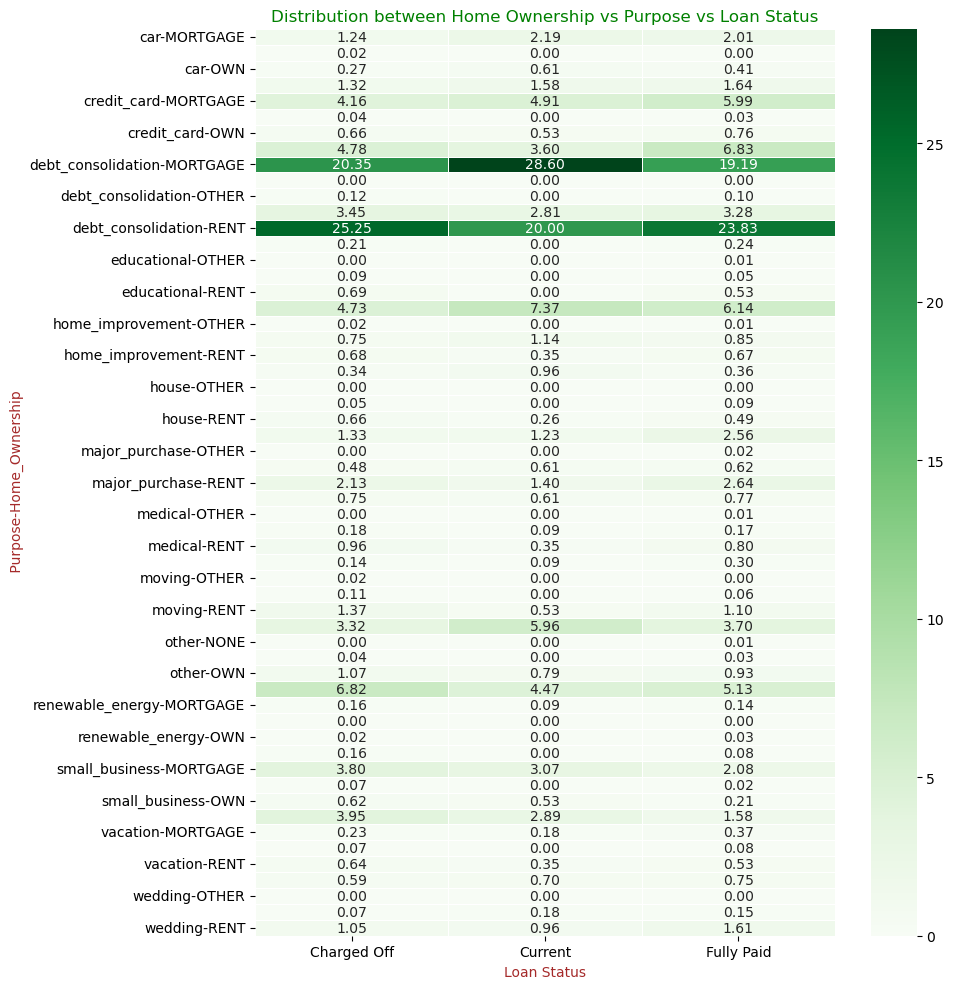

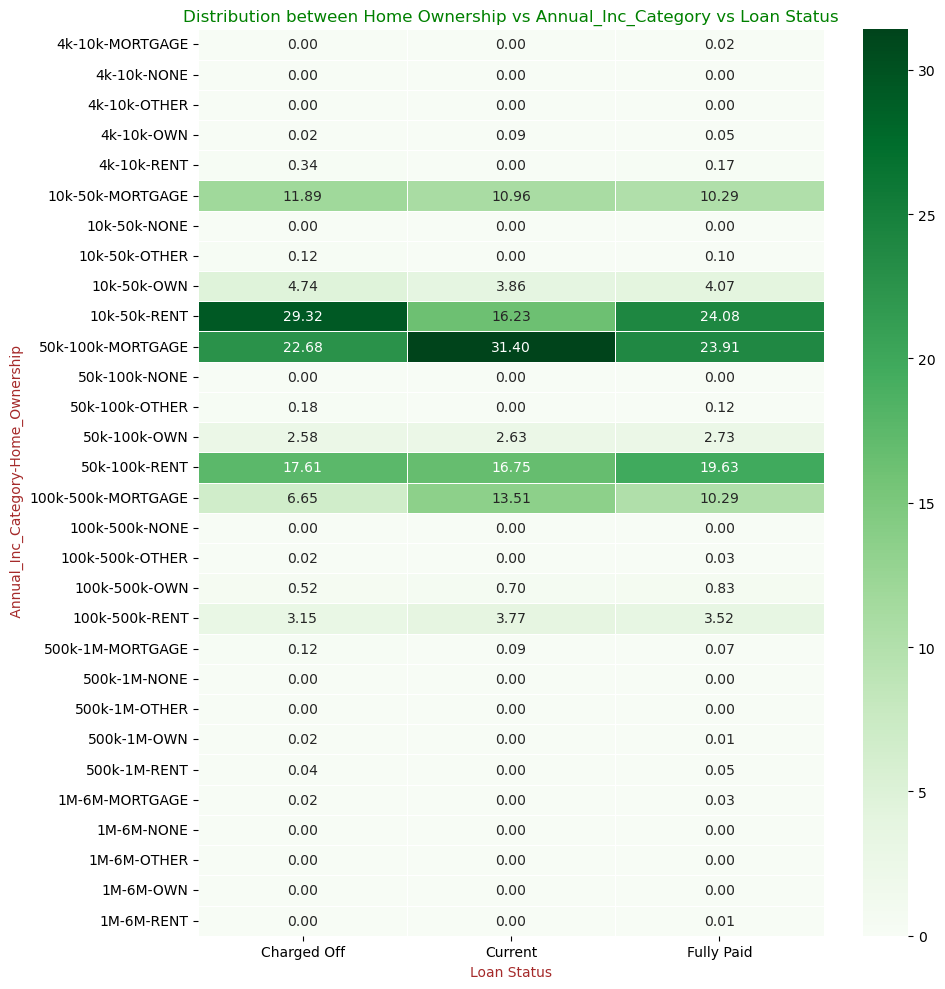

In [141]:
for column in ["verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["home_ownership", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "home_ownership"], columns="loan_status", values="Count", fill_value=0)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

    plt.title(f"Distribution between Home Ownership vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Home_Ownership", color="brown")

    plt.tight_layout()
    plt.show()

- Home Ownership:
   - Individuals who are not verified and Rented show a strong tendency to repay their loans and a strong likelihood of experiencing a charge-off as-well.
       > With respect to ongoing loan, individuals who are Mortgaged, Rented and are verified are riskier and most likely to default.
   - Individuals who have applied for debt consolidation and Rented show a strong tendency to repay their loans and a strong likelihood of experiencing a charge-off as-well.
       > With respect to ongoing loan, individuals who are Rented and took loan for debt consolidation ae more likely to get default whereas individual with Mortgage and took loan for similar purpose has small probability of getting default.
   - Individuals earning 50k-100k rented are likely to repay the loan and a strong likelihood of experiencing a charge-off.
       > With respect to ongoing loan, individuals who are rented and annual salary is in between 10k-50k are riskier and likely to get default.

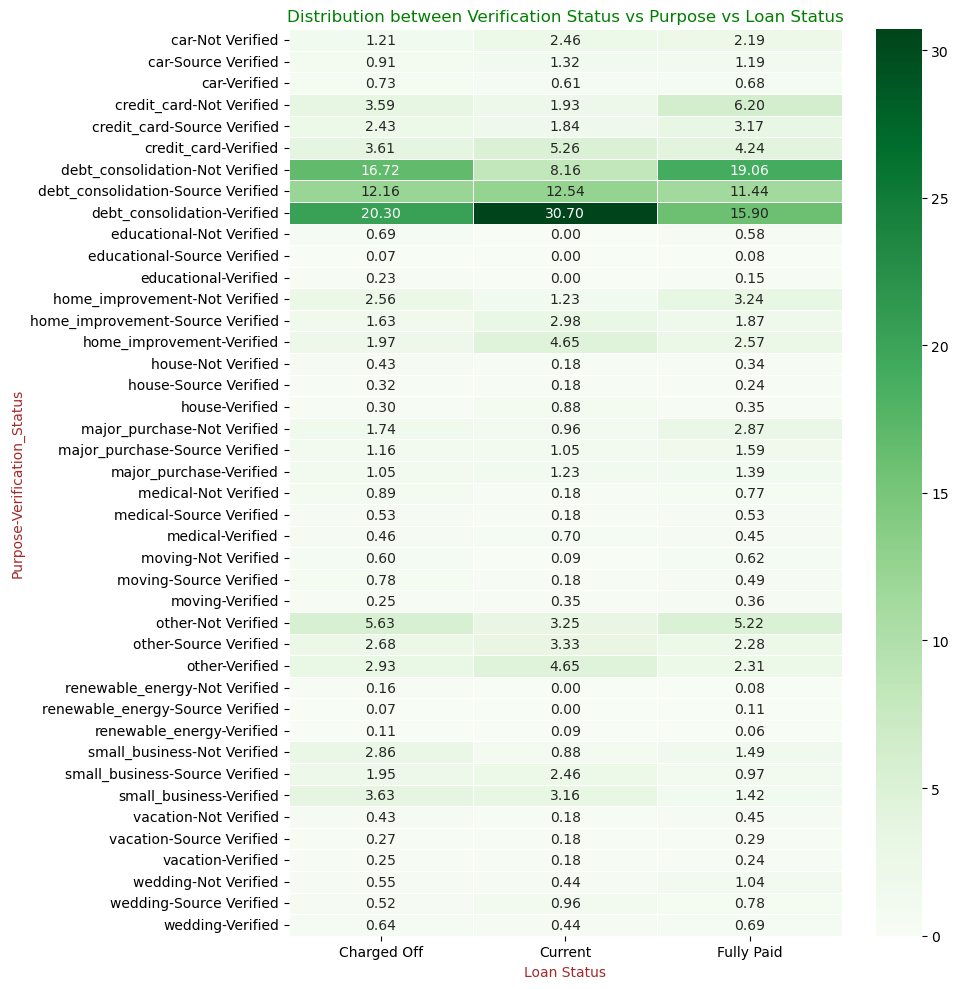

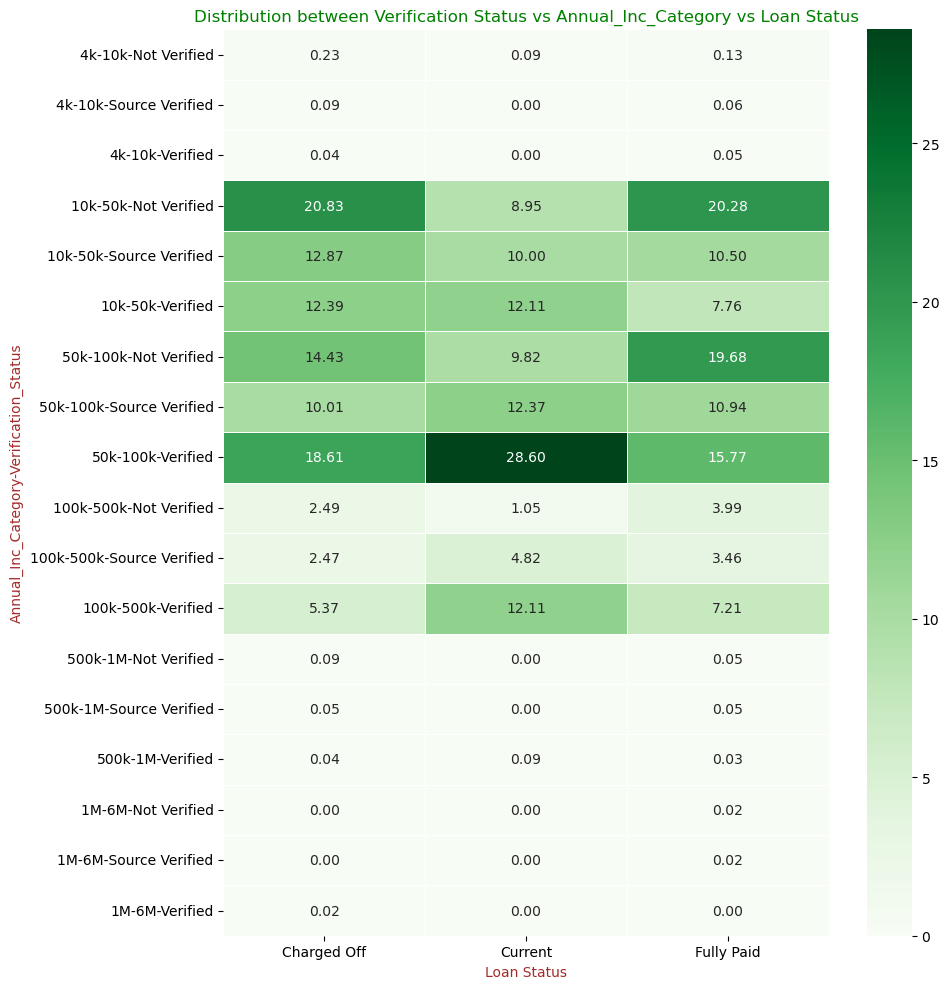

In [142]:
for column in ["purpose", "annual_inc_category"]:
    counts = df.groupby(["verification_status", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "verification_status"], columns="loan_status", values="Count", fill_value=0)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

    plt.title(f"Distribution between Verification Status vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f"{column.title()}-Verification_Status", color="brown")

    plt.tight_layout()
    plt.show()

- Verification Status
    - Individuals who took loan for debt-consolidation and are not verified exhibit stronger trend to repay the loan whereas individual who applied for same purpose and are verified are most likely to be charged off.
        > With respect to ongoing loan, individuals who are verified and appled for debt consolidation are riskier and are likely to get default.
    - Individuals who has annual income ranging 10k-50k not verified and income ranging 50k-100k not verified exhibit stronger trend to repay the loan whereas income range 10k-50k not verified exhibit strong likelihood to get charged off. 
        > With respect to ongoing loan, individuals who are verified and salary ranges are 10k-100k are more riskier and are likely to get default. For source verified individuals whose salary ranges between 10k-50k are also riskier and likely to get default

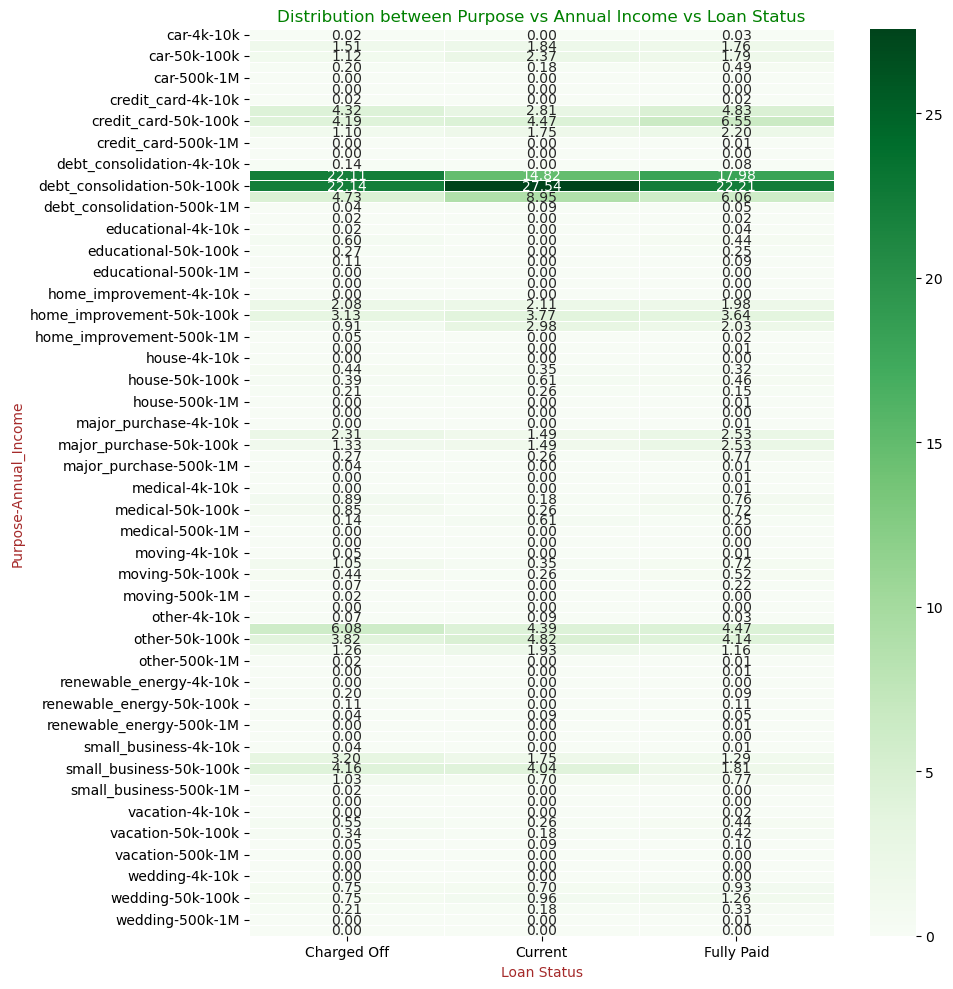

In [143]:
counts = df.groupby(["purpose", "annual_inc_category", "loan_status"]).size().reset_index(name="Count")

heatmap_data = counts.pivot_table(index=["purpose", "annual_inc_category"], columns="loan_status", values="Count", fill_value=0)
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

plt.title("Distribution between Purpose vs Annual Income vs Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Purpose-Annual_Income", color="brown")

plt.tight_layout()
plt.show()

- Purpose
    - Individuals who took loan for debt-consolidation and are earning between 50k-100k exhibit stronger trend to repay the loan and a strong likelihood of experiencing a charge-off.
        > With respect to ongoing loan, individuals who applied for debt consolidation and annual income ranges between 4k-10k are riskier and are likely to get default.

##### Analysis on Loan Status with Categories and Numerical Column

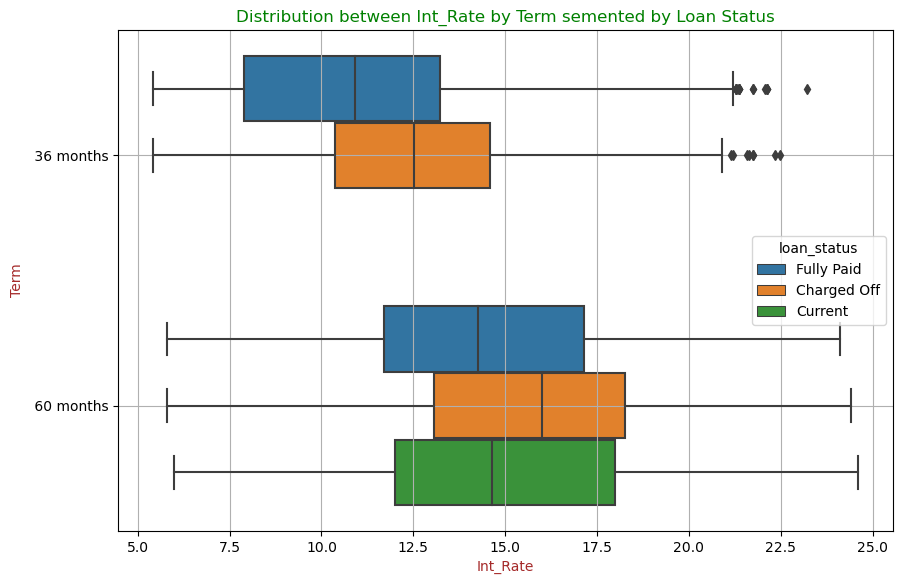

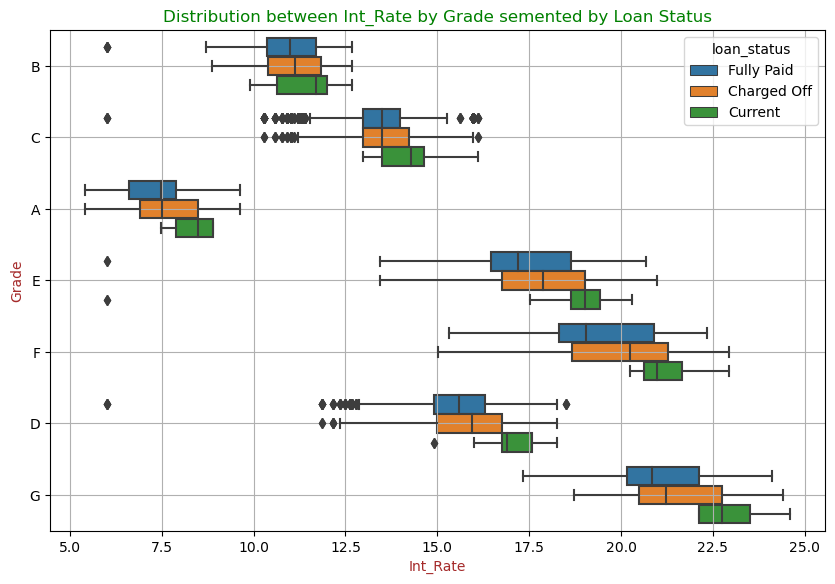

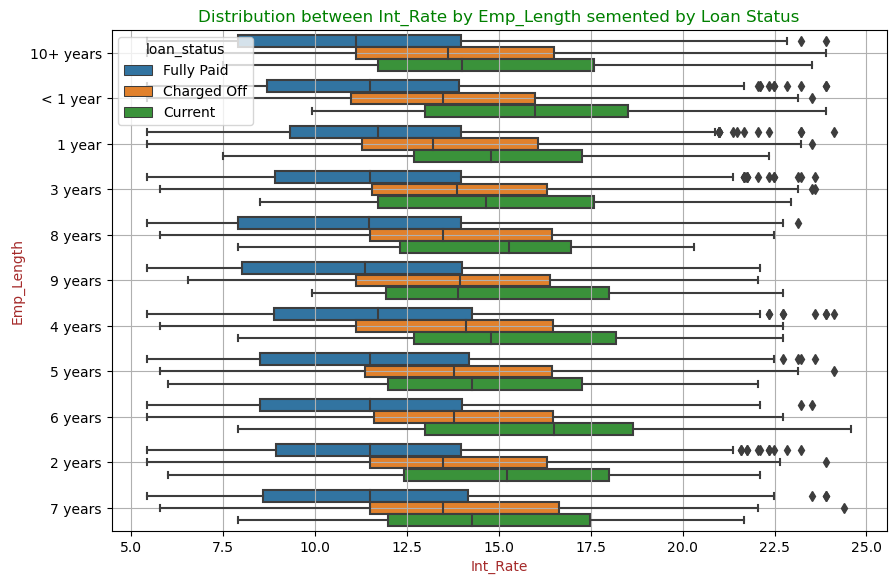

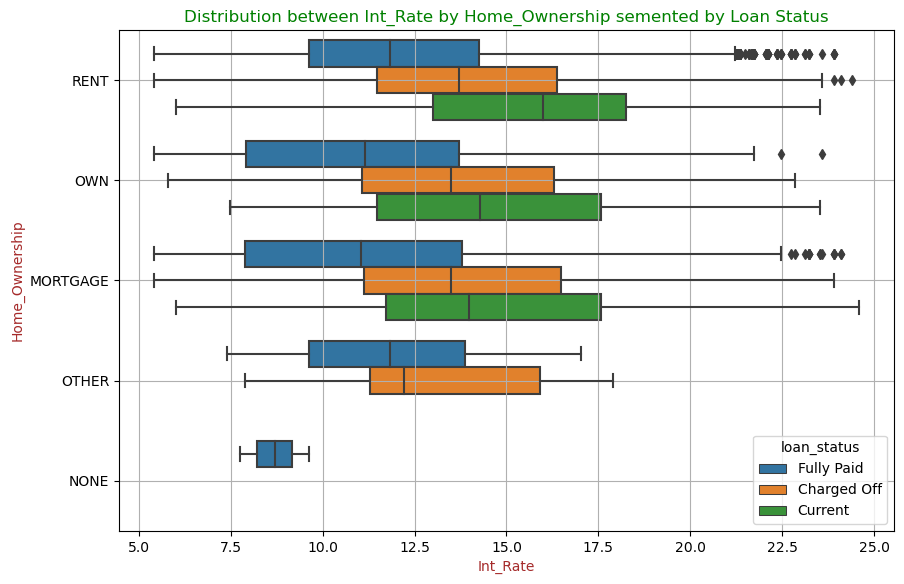

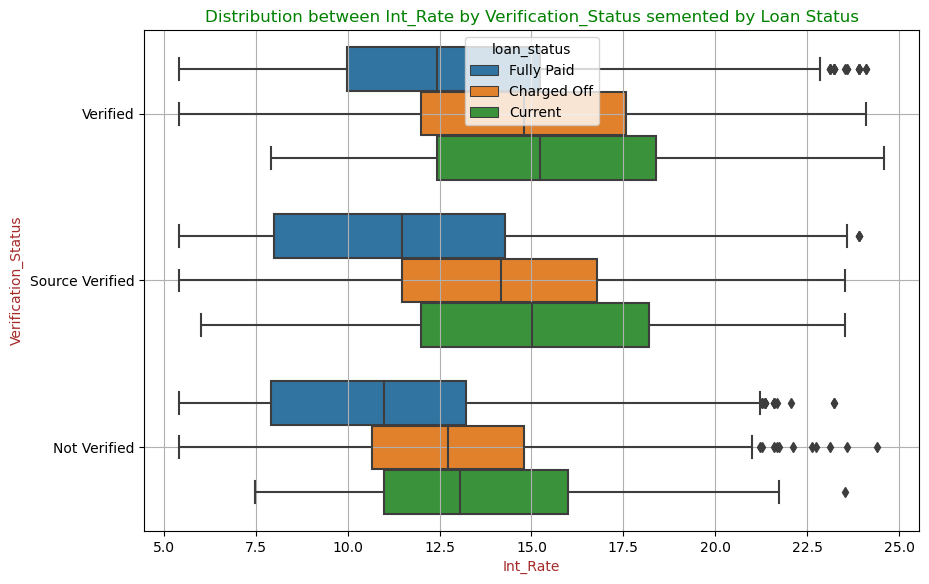

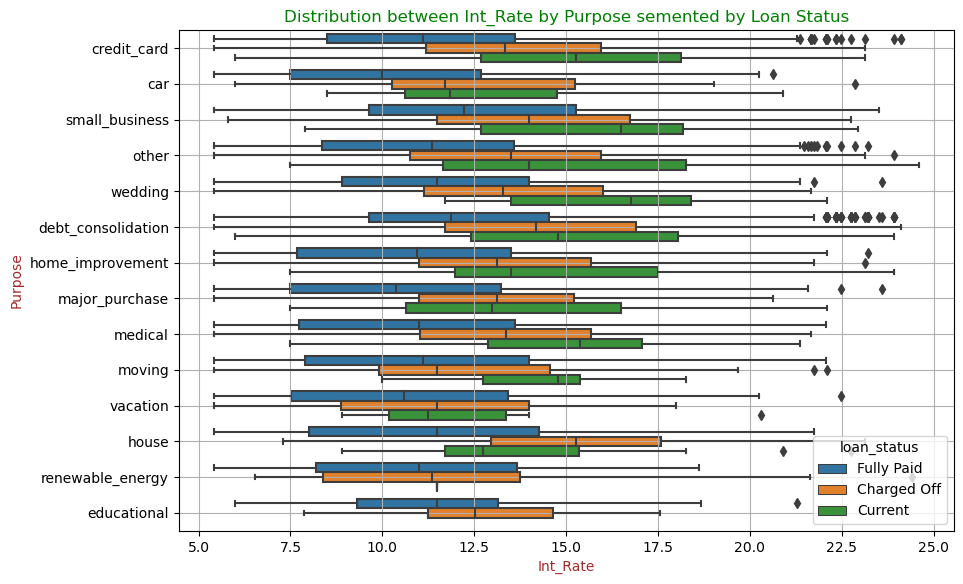

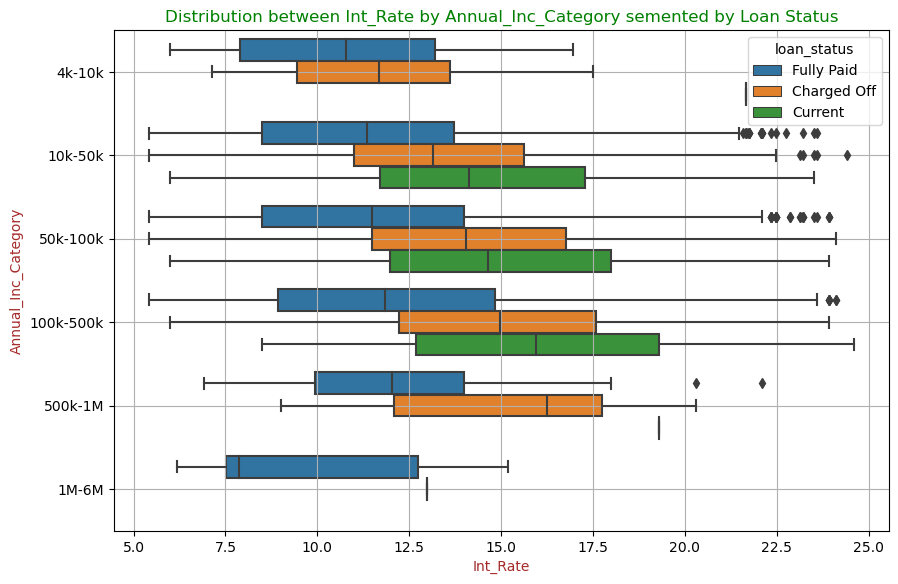

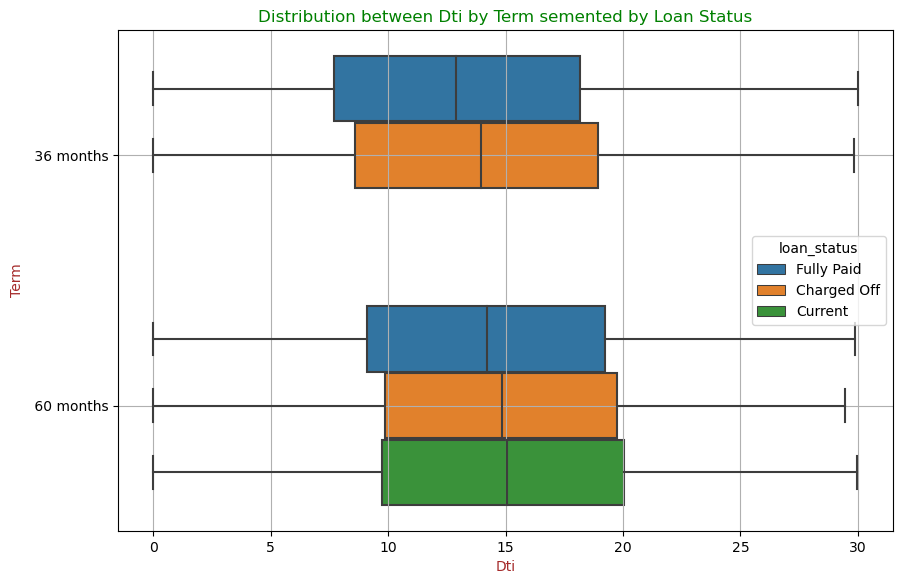

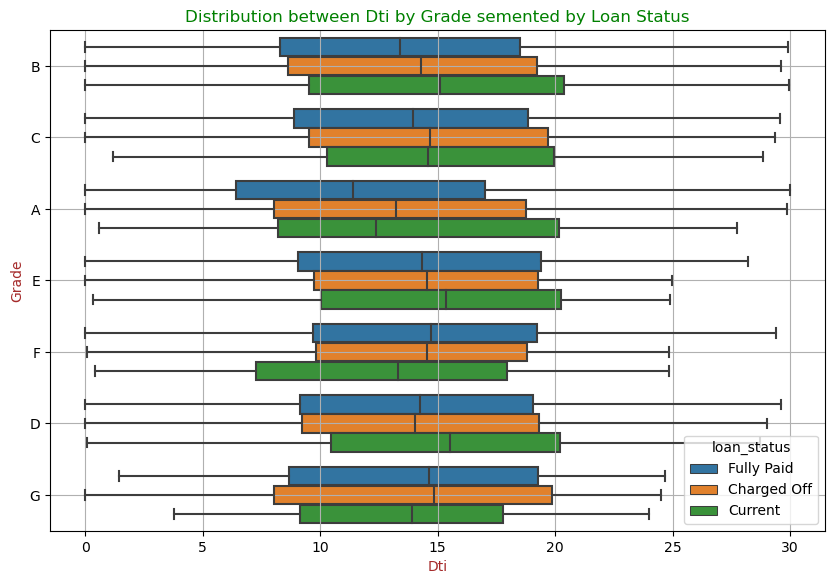

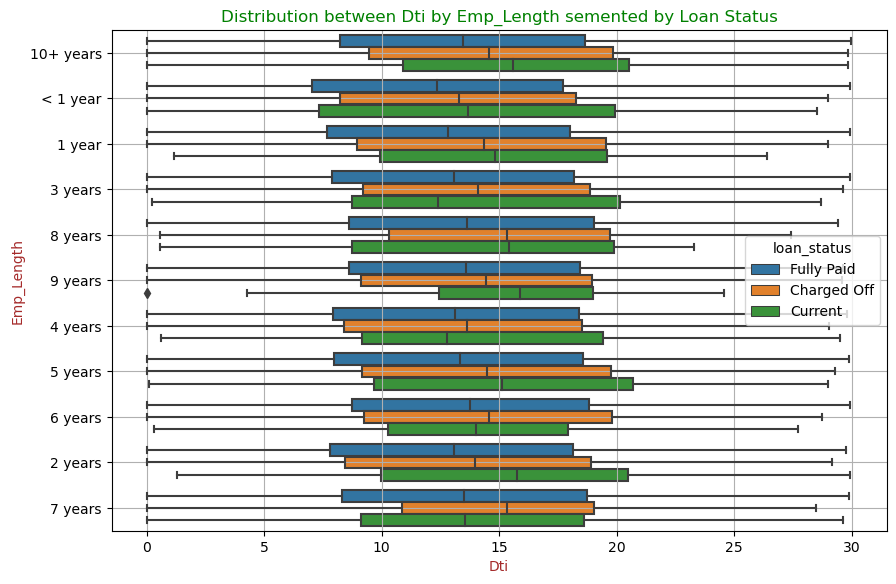

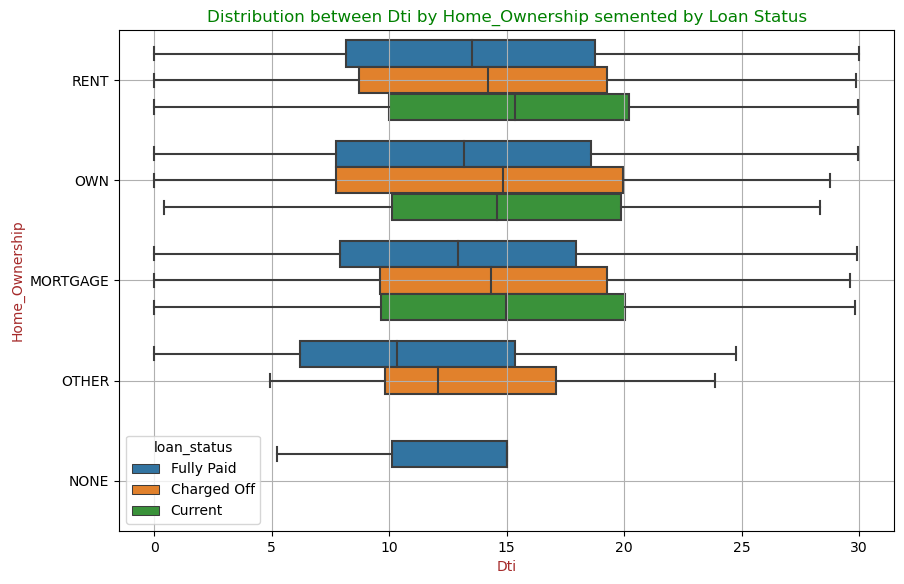

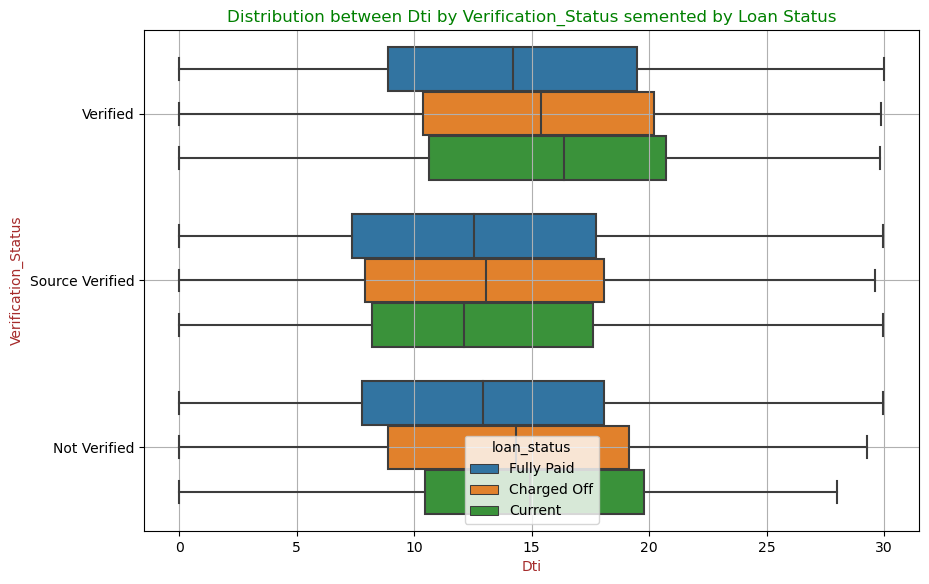

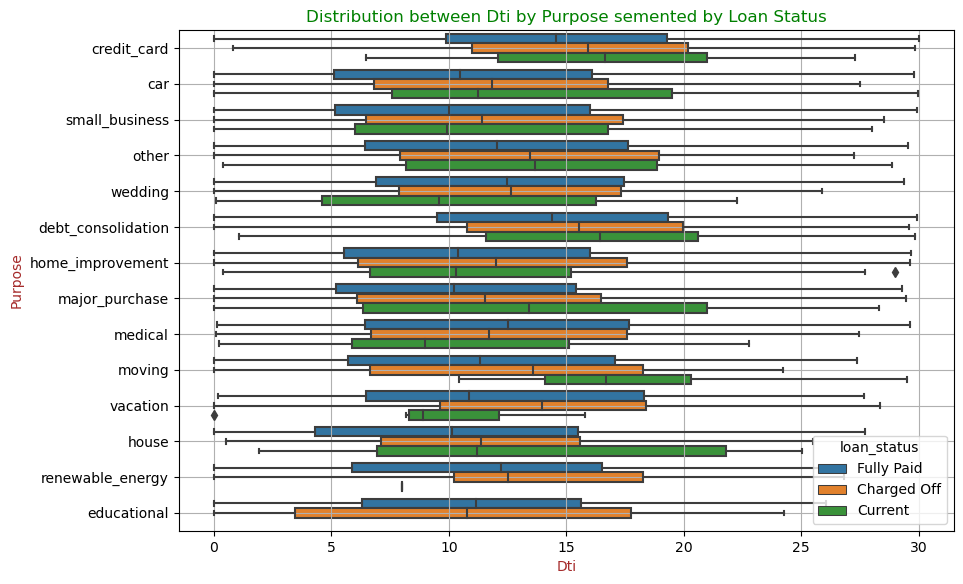

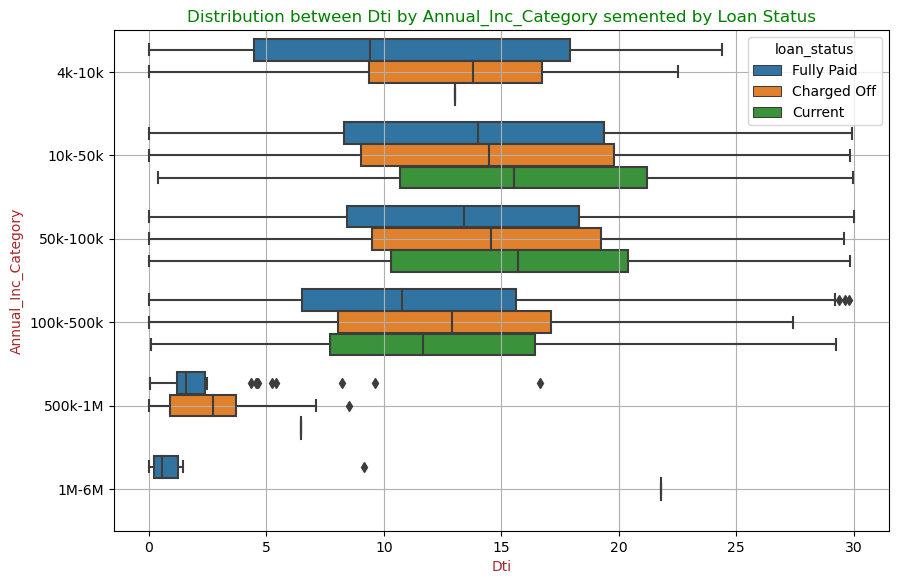

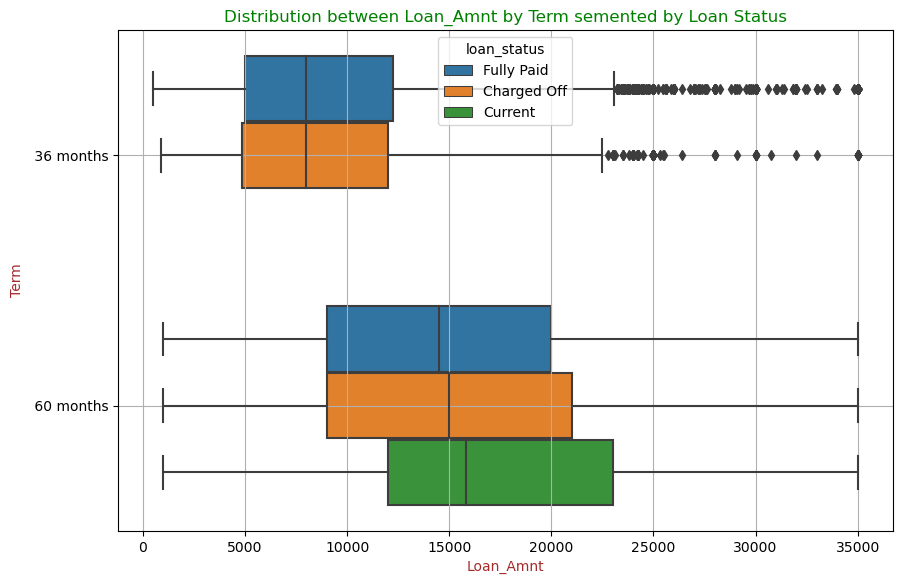

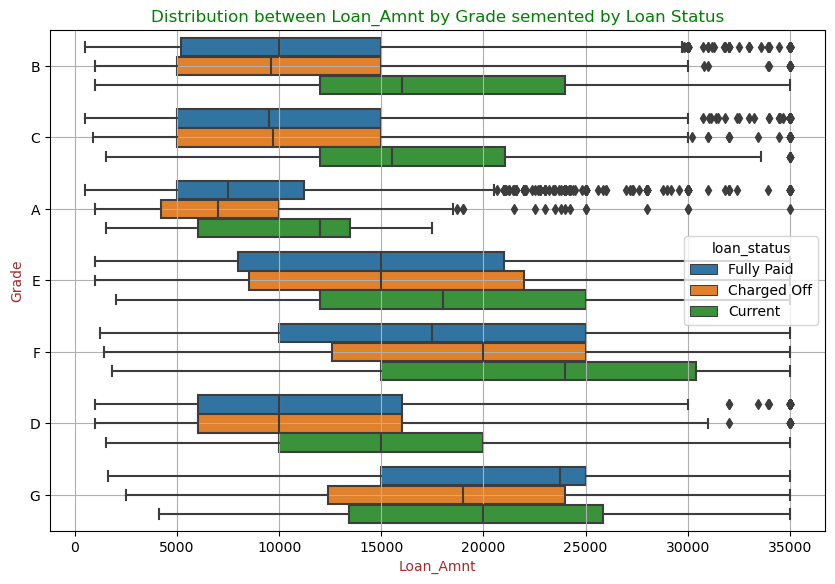

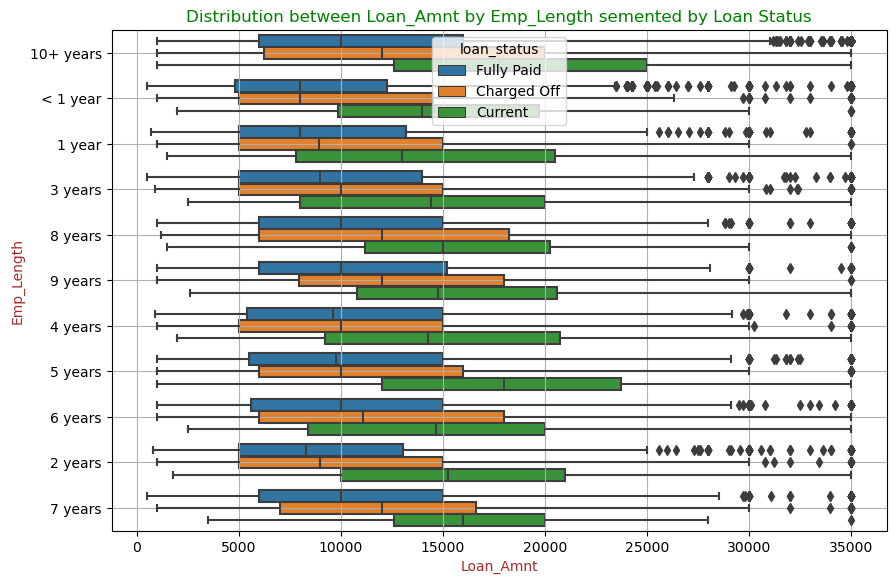

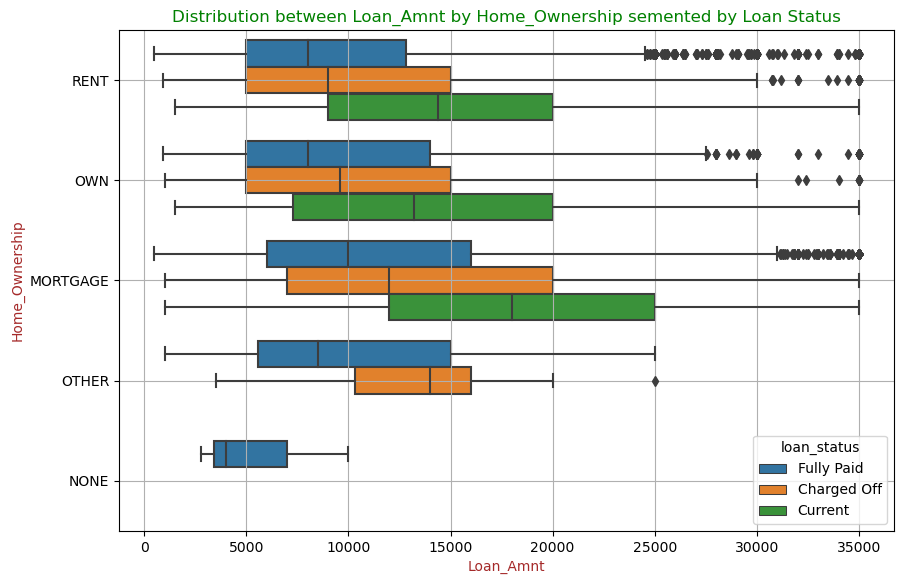

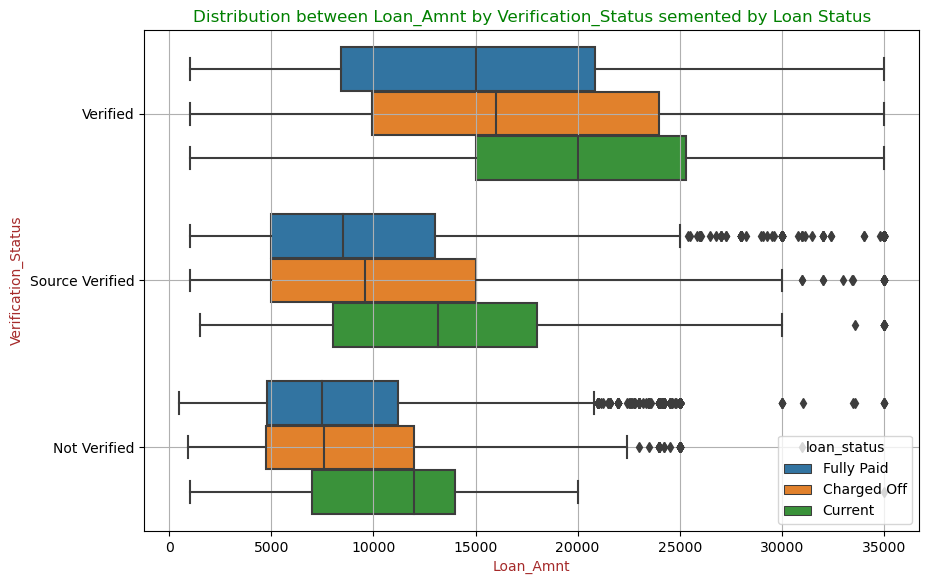

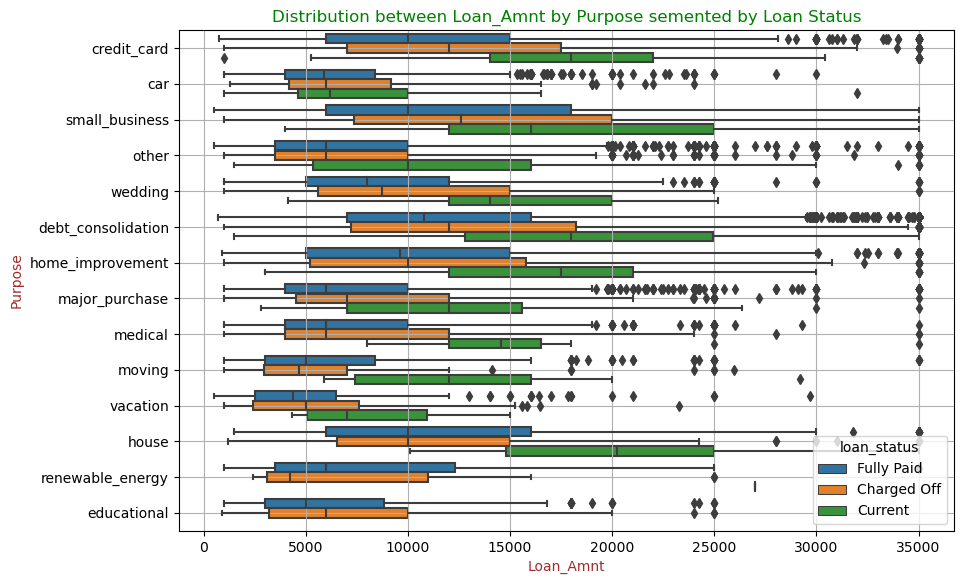

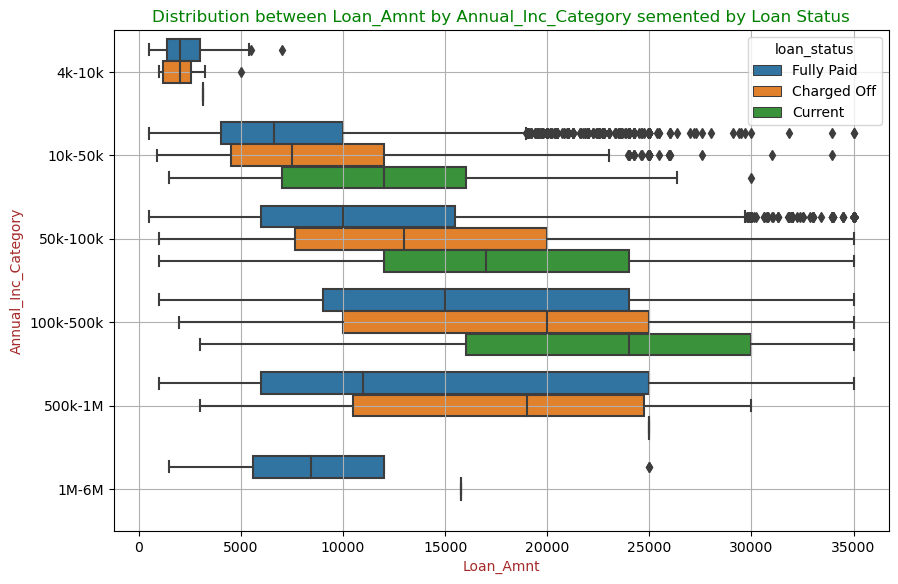

In [105]:
for numerical in ["int_rate", "dti", "loan_amnt"]:
    for category in ["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
        plt.figure(figsize=(10, 6.5))
        sns.boxplot(x=numerical, y=category, hue="loan_status", data=df)

        plt.title(f"Distribution between {numerical.title()} by {category.title()} semented by Loan Status", color="green")
        plt.xlabel(f"{numerical.title()}", color="brown")
        plt.ylabel(f"{category.title()}", color="brown")

        plt.grid(True)

        plt.show()

- Interest Rate
    - Term
        - Loans with a 36-month term generally have lower interest rates than those with a 60-month term. "Charged Off" loans tend to have slightly higher interest rates compared to "Fully Paid" and "Current" loans across both terms, suggesting a potential relationship between higher interest rates and loan default risk.
        > Risky to give loans at higher interest rates, particularly for 60-month terms, as these are associated with higher chances of default.
    - Grade
        - Lower-grade loans (e.g., D, E, F, G) generally have higher interest rates than higher-grade loans (e.g., A, B, C). "Charged Off" loans tend to have slightly higher interest rates across most grades, indicating a possible correlation between higher interest rates and the likelihood of default. The spread of interest rates increases with lower grades, indicating greater variability in rates for riskier loans
        > Risky to approve lower-grade loans with high interest rates, as these are more likely to result in defaults due to greater variability in rates.
    - Employee Experience
        - Interest rates tend to be consistent across different employee experience, with no significant variation based on the duration of employment. "Charged Off" loans have slightly higher interest rates across most employment lengths, suggesting a correlation between higher interest rates and loan default risk. The spread of interest rates is similar across all employment lengths, indicating that employment length does not significantly impact interest rate variability.
        > While employment length doesn't significantly impact risk, loans with higher interest rates remain riskier, regardless of employment duration.
    - Home Ownership
        - Interest rates remain consistent across different home ownership types, with no significant variation based on the type of home. "Charged Off" loans generally have slightly higher interest rates across all home ownership categories, indicating a potential link between higher interest rates and loan default risk. The variation in interest rates is similar across all home ownership types, suggesting that home ownership does not notably influence interest rate differences.
        > Risky to issue loans with higher interest rates across all home ownership categories, as higher rates are linked to a greater likelihood of default.
    - Verification Status
        - Verification status significantly impacts loan status. Verified loans have a higher proportion of fully paid loans and lower charged-off rates compared to source verified and not verified loans. This suggests a strong correlation between loan verification and repayment behavior. Interest rates also vary across verification statuses, with verified loans generally having lower interest rates
        > Less risky to give loans to verified individuals with lower interest rates, as verification improves repayment behavior.
    - Purpose
        - Interest rates vary slightly across different loan purposes. Car loans generally have the lowest interest rates, while home loans tend to have higher interest rates. "Charged Off" loans generally have slightly higher interest rates across all purposes, indicating a potential link between higher interest rates and loan default risk. The variation in interest rates is significant across different purposes, suggesting that purpose does influence interest rate differences.
        > Risky to approve loans for purposes with higher interest rates, as these are more likely to default, particularly for purposes like home improvement or small business.
    - Annual Income Range
        - As annual income increases, interest rates tend to rise, except within the 1M-6M income range. "Charged Off" loans generally carry slightly higher interest rates across all income ranges, suggesting a potential connection between higher interest rates and loan default risk. The variability in interest rates increases with higher annual incomes, indicating greater fluctuation in rates for riskier loans.
        > Risky to approve loans with higher interest rates across all income ranges, as higher rates are linked to default risk, especially for lower income ranges.
    
- Debt to Income Ratio
    - Term
        - Loans with a 36-month term generally have lower Debt-to-Income (DTI) ratio than those with a 60-month term. "Charged Off" loans tend to have slightly higher debt to income ratio compared to "Fully Paid" and "Current" loans across both terms, suggesting a potential relationship between debt to income ratio and loan default risk.
        > Risky to approve loans with higher DTI ratios, especially for 60-month terms, as these are associated with higher default risks.
    - Grade
        - DTI ratio distribution is similar across different loan grades for fully paid, charged-off, and current loans. However, lower grades (E, F, G) tend to have a slightly wider DTI range, particularly for charged-off loans, indicating higher variability in DTI for riskier loan grades. This suggests that borrowers with lower grades might have a higher risk of default.
        > Risky to approve lower-grade loans with higher DTI ratios, as these loans show greater variability and a higher likelihood of default.
    - Employee Experience
        - DTI ratio distribution is fairly consistent across different employment lengths for fully paid, charged-off, and current loans. There is no clear trend showing that longer or shorter employment length significantly affects the DTI ratio or the likelihood of loan status outcomes. This suggests that employment length may not be a strong predictor of loan performance when segmented by DTI ratio.
        > Employment experience does not strongly influence DTI risk, but loans with higher DTI ratios remain risky.
    - Home Ownership
        - Individuals who rent or have a mortgage exhibit a wider range of DTI ratios, especially among those who are fully paid or charged off. Borrowers who own their homes or have no listed ownership type generally show more concentrated DTI distributions. This indicates that home ownership status, particularly renting or mortgaging, may contribute to higher variability in DTI ratios and potential risk in loan outcomes.
        > Risky to approve loans for renters or those with mortgages with higher DTI ratios, as these groups exhibit more variability and higher default risks.
    - Verification Status
        - Verification status significantly impacts loan status and DTI distribution. Verified loans have the highest proportion of fully paid loans and the higher DTI levels, while not verified loans have the highest charge-off rates and the lowest DTI ratios. This suggests a strong correlation between verification status, DTI, and loan repayment behavior.
        > Less risky to approve verified loans with higher DTI ratios, as verification improves repayment behavior, but risky to approve non-verified loans.
    - Purpose
        - For most purposes, loans with a higher DTI ratio are more likely to be charged off or remain current, rather than being fully paid. Debt consolidation and small business loans have a wider DTI range, suggesting higher risk variability.
        > Risky to approve loans with higher DTI ratios for these purposes, as they show a higher likelihood of default.
    - Annual Income Range
        - The relationship between income category and loan status, segmented by DTI ratio, appears to be moderately strong. Higher income categories show a clear trend of lower DTIs and more fully paid loans, while lower-income categories tend to have higher DTIs and a higher proportion of charged-off loans.
        > Risky to approve loans with higher DTIs, particularly for lower income brackets, as these are more likely to default.
    
- Loan Amount
    - Term
        - Loans with a 60-month term generally have higher loan amounts compared to those with a 36-month term. "Charged Off" loans are more common at higher loan amounts, especially in the 60-month term, indicating a potential link between larger loan amounts and increased default risk.
        > Risky to approve larger loan amounts for 60-month terms, as these are linked to higher default risks.
    - Grade
        - Lower-grade loans (e.g., D, E, F, G) generally involve larger loan amounts compared to higher-grade loans (e.g., A, B, C). "Charged Off" loans are more common in the lower grades (E, F, G), and "Current" loans tend to involve larger amounts, especially in lower grades. The variability in loan amounts is greater for lower-grade loans, indicating higher risk and diversity in borrowing behavior.
        > Risky to approve larger loan amounts for lower-grade loans, as these show a higher likelihood of default.
    - Employee Experience
        - Loan amounts tend to be consistent across different employment lengths, with no significant variation based on the duration of employment. "Charged Off" loans appear in similar proportions across all employment lengths, suggesting that the risk of default is not strongly influenced by employment length. The spread of loan amounts is also similar across all employment lengths, indicating that employment length does not significantly impact the variability in loan amounts.
        > Employment experience does not strongly influence loan amount risk, but larger loan amounts remain risky.
    - Home Ownership
        - Loan amounts vary based on home ownership type, with those owning or having a mortgage generally taking larger loans. "Charged Off" loans appear consistently across all home ownership categories, indicating that home ownership does not significantly impact the likelihood of default. The spread of loan amounts is relatively consistent across categories, suggesting that home ownership type does not greatly influence the variability in loan amounts.
        > Risky to approve larger loan amounts for those with a mortgage or ownership, as larger loans correlate with higher default risks.
    - Verification Status
        - Verification status impacts loan amount, but not uniformly. While verified loans show a higher proportion of fully paid loans, they also have a greater proportion of charged-off loans compared to source verified and not verified loans. This suggests that verification alone may not fully predict repayment behavior, and other factors might influence the likelihood of loan default.
        > Less risky to approve verified loans, but caution is needed with larger amounts, as they may still result in defaults.
    - Purpose
        - For most loan purposes, "Charged Off" loans exhibit a larger spread in loan amounts compared to "Fully Paid" loans, indicating higher variability and risk associated with default. The exception is the "Moving" purpose, where "Charged Off" loans have a smaller spread than "Fully Paid" loans, suggesting more consistent outcomes for this purpose. This relationship suggests that higher variability in loan amounts may correlate with an increased likelihood of loans being charged off.
        > Risky to approve larger loan amounts for purposes like debt consolidation, as higher variability correlates with increased default likelihood.
    - Annual Income Range
        - As annual income increases, loan amounts generally rise, except within the 1M-6M income range, where loan amounts remain consistent. "Charged Off" loans show a similar distribution across income categories, indicating that higher incomes do not necessarily reduce the risk of default. The variability in loan amounts increases with higher annual incomes, suggesting that larger loans come with greater risk and fluctuation in repayment outcomes.
        > Risky to approve larger loan amounts, even for higher income categories, as larger loans come with greater risk and variability in repayment outcomes.